In [3]:
import sys
!{sys.executable} -m pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


🔬 CIC-IoT-2023 Paper Results Reproduction
📖 Paper: 'A Comprehensive Security Framework for Asymmetrical IoT Network Environments'
🚀 STARTING COMPLETE CIC-IoT-2023 ANALYSIS
📁 Data path: /home/rafia-khan/Downloads/kaggle
📊 Max files: 100
🎯 Samples per file: 1500
🔍 Scanning for CSV files...
📁 Found 169 CSV files in /home/rafia-khan/Downloads/kaggle
📊 Using first 100 files for processing
🚀 Loading CSV files with memory optimization...


Loading files:  26%|██████▊                   | 26/100 [00:00<00:00, 255.07it/s]

📦 Processed 10/100 files, current memory: 0.38GB
📦 Processed 20/100 files, current memory: 0.38GB
📦 Processed 30/100 files, current memory: 0.38GB
📦 Processed 40/100 files, current memory: 0.38GB
📦 Processed 50/100 files, current memory: 0.38GB


Loading files:  52%|█████████████▌            | 52/100 [00:00<00:00, 257.78it/s]

📦 Processed 60/100 files, current memory: 0.38GB


Loading files: 100%|█████████████████████████| 100/100 [00:00<00:00, 257.41it/s]


📦 Processed 70/100 files, current memory: 0.38GB
📦 Processed 80/100 files, current memory: 0.38GB
📦 Processed 90/100 files, current memory: 0.38GB
📦 Processed 100/100 files, current memory: 0.38GB
🔄 Combining all dataframes...
✅ Successfully loaded 150000 samples from 100 files
💾 Final dataset shape: (150000, 47)
📊 Memory usage: 0.43GB

📊 COMPREHENSIVE DATASET EXPLORATION
📈 Total Samples: 150,000
🎯 Total Features: 47
💾 Memory Usage: 0.06 GB

🔍 Data Types:
float64    46
object      1
Name: count, dtype: int64

🎯 Target Column: 'label'
📊 Target Distribution:
   DDoS-ICMP_Flood: 23,130 samples (15.42%)
   DDoS-UDP_Flood: 17,326 samples (11.55%)
   DDoS-TCP_Flood: 14,505 samples (9.67%)
   DDoS-SYN_Flood: 13,194 samples (8.80%)
   DDoS-PSHACK_Flood: 13,113 samples (8.74%)
   DDoS-RSTFINFlood: 13,105 samples (8.74%)
   DDoS-SynonymousIP_Flood: 11,563 samples (7.71%)
   DoS-UDP_Flood: 10,549 samples (7.03%)
   DoS-TCP_Flood: 8,540 samples (5.69%)
   DoS-SYN_Flood: 6,505 samples (4.34%)
   Be

Traceback (most recent call last):
  File "/tmp/ipykernel_48747/430354682.py", line 602, in run_complete_analysis
    results, feature_importance = self.paper_methodology_pipeline()
  File "/tmp/ipykernel_48747/430354682.py", line 336, in paper_methodology_pipeline
    self.generate_paper_visualizations(y_test, y_pred, feature_importance_df)
  File "/tmp/ipykernel_48747/430354682.py", line 485, in generate_paper_visualizations
    displayed_class_names = [class_names[i] for i in unique_classes] if len(class_names) > max(unique_classes) else class_names
TypeError: '>' not supported between instances of 'int' and 'str'


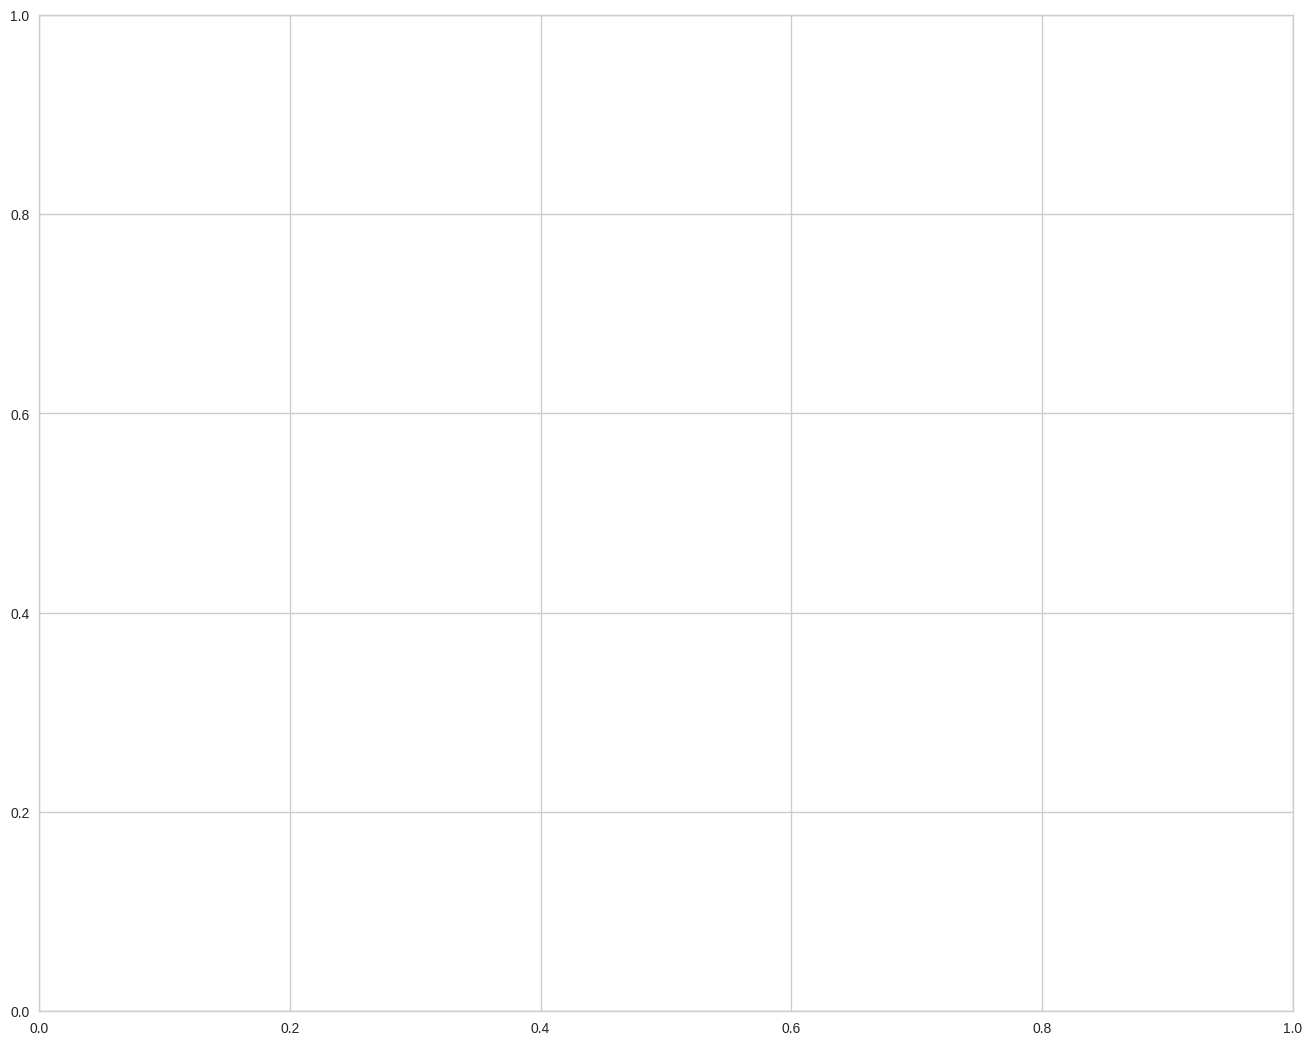

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import warnings
import glob
import os
import gc
from tqdm import tqdm
import psutil
warnings.filterwarnings('ignore')

# Set style for academic paper reproduction
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

class CICIoT2023PaperReproducer:
    def __init__(self):
        self.df = None
        self.model = None
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()
        self.results = {}
        self.data_path = "/home/rafia-khan/Downloads/kaggle"
        self.target_col = None
        self.class_names = None
        
    def get_memory_usage(self):
        """Get current memory usage"""
        process = psutil.Process()
        return process.memory_info().rss / 1024 ** 3  # GB
    
    def load_all_csv_files_optimized(self, max_files=None, sample_per_file=1000):
        """
        Load all CSV files from the kaggle folder with memory optimization
        """
        print("🔍 Scanning for CSV files...")
        csv_files = glob.glob(os.path.join(self.data_path, "*.csv"))
        print(f"📁 Found {len(csv_files)} CSV files in {self.data_path}")
        
        if not csv_files:
            raise ValueError(f"No CSV files found in {self.data_path}")
        
        # Limit files if specified
        if max_files and len(csv_files) > max_files:
            print(f"📊 Using first {max_files} files for processing")
            csv_files = csv_files[:max_files]
        
        dfs = []
        total_files = len(csv_files)
        
        print("🚀 Loading CSV files with memory optimization...")
        for i, file_path in enumerate(tqdm(csv_files, desc="Loading files")):
            try:
                # Check memory usage
                if self.get_memory_usage() > 8:  # If using more than 8GB
                    print(f"🔄 Memory high ({self.get_memory_usage():.2f}GB), cleaning up...")
                    gc.collect()
                
                # Load file with optimized parameters
                temp_df = pd.read_csv(
                    file_path, 
                    low_memory=False,
                    nrows=sample_per_file  # Sample from each file to manage size
                )
                
                # Basic validation
                if len(temp_df) > 0 and self.validate_dataframe(temp_df):
                    dfs.append(temp_df)
                    
                # Progress update every 10 files
                if (i + 1) % 10 == 0:
                    print(f"📦 Processed {i+1}/{total_files} files, current memory: {self.get_memory_usage():.2f}GB")
                    
            except Exception as e:
                print(f"❌ Error loading {os.path.basename(file_path)}: {e}")
                continue
        
        if not dfs:
            raise ValueError("No valid data could be loaded from any file")
        
        # Combine all dataframes
        print("🔄 Combining all dataframes...")
        self.df = pd.concat(dfs, ignore_index=True)
        
        print(f"✅ Successfully loaded {len(self.df)} samples from {len(dfs)} files")
        print(f"💾 Final dataset shape: {self.df.shape}")
        print(f"📊 Memory usage: {self.get_memory_usage():.2f}GB")
        
        return self.df
    
    def validate_dataframe(self, df):
        """Validate if dataframe has required structure"""
        if len(df.columns) < 5:  # Minimum expected features
            return False
        if df.isnull().all().all():  # All nulls
            return False
        return True
    
    def explore_dataset_comprehensive(self):
        """
        Comprehensive dataset exploration
        """
        print("\n" + "="*70)
        print("📊 COMPREHENSIVE DATASET EXPLORATION")
        print("="*70)
        
        print(f"📈 Total Samples: {self.df.shape[0]:,}")
        print(f"🎯 Total Features: {self.df.shape[1]}")
        print(f"💾 Memory Usage: {self.df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")
        
        # Basic info
        print("\n🔍 Data Types:")
        print(self.df.dtypes.value_counts())
        
        # Target analysis
        self.target_col = self.find_target_column()
        print(f"\n🎯 Target Column: '{self.target_col}'")
        
        if self.target_col in self.df.columns:
            print(f"📊 Target Distribution:")
            target_counts = self.df[self.target_col].value_counts()
            for value, count in target_counts.items():
                percentage = (count / len(self.df)) * 100
                print(f"   {value}: {count:,} samples ({percentage:.2f}%)")
        
        # Missing values analysis
        print(f"\n❓ Missing Values Analysis:")
        missing_percent = (self.df.isnull().sum() / len(self.df)) * 100
        missing_stats = missing_percent[missing_percent > 0].sort_values(ascending=False)
        if len(missing_stats) > 0:
            for col, percent in missing_stats.head(10).items():
                print(f"   {col}: {percent:.2f}% missing")
        else:
            print("   No missing values found!")
        
        # Display first few columns
        print(f"\n📋 First 15 Columns:")
        for i, col in enumerate(self.df.columns[:15]):
            print(f"   {i+1:2d}. {col} ({self.df[col].dtype})")
    
    def clean_and_preprocess_data(self):
        """
        Comprehensive data cleaning and preprocessing
        """
        print("\n" + "="*70)
        print("🧹 DATA CLEANING AND PREPROCESSING")
        print("="*70)
        
        original_shape = self.df.shape
        print(f"📦 Original shape: {original_shape}")
        
        # 1. Remove duplicate rows
        self.df = self.df.drop_duplicates()
        print(f"✅ After removing duplicates: {self.df.shape}")
        
        # 2. Remove columns with high missingness (>80%)
        missing_percent = (self.df.isnull().sum() / len(self.df)) * 100
        columns_to_drop = missing_percent[missing_percent > 80].index.tolist()
        self.df = self.df.drop(columns=columns_to_drop)
        print(f"✅ Dropped {len(columns_to_drop)} columns with >80% missing values")
        
        # 3. Remove constant columns
        constant_cols = [col for col in self.df.columns if self.df[col].nunique() <= 1]
        self.df = self.df.drop(columns=constant_cols)
        print(f"✅ Dropped {len(constant_cols)} constant columns")
        
        # 4. Remove low variance columns
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) > 0:
            variances = self.df[numeric_cols].var()
            low_variance_cols = variances[variances < 0.01].index.tolist()
            self.df = self.df.drop(columns=low_variance_cols)
            print(f"✅ Dropped {len(low_variance_cols)} low variance columns")
        
        # 5. Fill missing values
        for col in self.df.columns:
            if self.df[col].isnull().sum() > 0:
                if self.df[col].dtype in ['float64', 'int64']:
                    self.df[col].fillna(self.df[col].median(), inplace=True)
                else:
                    self.df[col].fillna(self.df[col].mode()[0] if len(self.df[col].mode()) > 0 else 'Unknown', inplace=True)
        
        print(f"✅ Filled missing values")
        
        # 6. Optimize memory usage
        self.df = self.optimize_memory_usage(self.df)
        
        print(f"🎯 Final shape after cleaning: {self.df.shape}")
        print(f"💾 Final memory usage: {self.df.memory_usage(deep=True).sum() / 1024**3:.2f} GB")
        
        gc.collect()
    
    def optimize_memory_usage(self, df):
        """Optimize dataframe memory usage"""
        print("🔄 Optimizing memory usage...")
        
        for col in df.columns:
            col_type = df[col].dtype
            
            if col_type in ['object']:
                # Convert object to category if cardinality not too high
                if df[col].nunique() / len(df) < 0.5:
                    df[col] = df[col].astype('category')
            
            elif col_type in ['float64']:
                # Downcast floats
                df[col] = pd.to_numeric(df[col], downcast='float')
            
            elif col_type in ['int64']:
                # Downcast integers
                df[col] = pd.to_numeric(df[col], downcast='integer')
        
        return df
    
    def handle_class_imbalance(self, min_samples_per_class=50, max_samples_per_class=3000):
        """
        Handle class imbalance for better model performance
        """
        print("\n" + "="*70)
        print("⚖️  HANDLING CLASS IMBALANCE")
        print("="*70)
        
        self.target_col = self.find_target_column()
        class_counts = self.df[self.target_col].value_counts()
        
        print("📊 Original Class Distribution:")
        for cls, count in class_counts.items():
            percentage = (count / len(self.df)) * 100
            print(f"   {cls}: {count:,} samples ({percentage:.2f}%)")
        
        # Filter classes with sufficient samples
        valid_classes = class_counts[class_counts >= min_samples_per_class].index
        filtered_df = self.df[self.df[self.target_col].isin(valid_classes)]
        
        print(f"\n✅ After filtering classes with <{min_samples_per_class} samples:")
        print(f"   Remaining samples: {len(filtered_df):,}")
        print(f"   Remaining classes: {len(valid_classes)}")
        
        # Balance classes - FIXED: Ensure we don't exceed available samples
        balanced_dfs = []
        for cls in valid_classes:
            cls_data = filtered_df[filtered_df[self.target_col] == cls]
            n_samples = min(len(cls_data), max_samples_per_class)
            
            if n_samples >= min_samples_per_class:
                sampled_data = cls_data.sample(n=n_samples, random_state=42)
                balanced_dfs.append(sampled_data)
        
        if balanced_dfs:
            self.df = pd.concat(balanced_dfs, ignore_index=True)
        else:
            raise ValueError("No valid classes after balancing")
        
        print(f"\n🎯 Final Balanced Distribution:")
        final_counts = self.df[self.target_col].value_counts()
        for cls, count in final_counts.items():
            percentage = (count / len(self.df)) * 100
            print(f"   {cls}: {count:,} samples ({percentage:.2f}%)")
        
        print(f"📦 Final dataset size: {len(self.df):,} samples")
        
        # Store class names for later use
        self.class_names = list(final_counts.index)
    
    def find_target_column(self):
        """Find the target column automatically"""
        target_candidates = ['label', 'Label', 'attack', 'Attack', 'class', 'Class', 
                           'category', 'Category', 'type', 'Type', 'outcome', 'Outcome']
        
        for candidate in target_candidates:
            if candidate in self.df.columns:
                return candidate
        
        # If no common target found, use last column
        return self.df.columns[-1]
    
    def paper_methodology_pipeline(self):
        """
        Implement the complete paper methodology pipeline
        """
        print("\n" + "="*70)
        print("🔬 PAPER METHODOLOGY PIPELINE")
        print("="*70)
        
        # 1. Prepare features and target
        self.target_col = self.find_target_column()
        print(f"🎯 Target column: {self.target_col}")
        
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        
        # Encode target and store class names
        if y.dtype == 'object':
            y_encoded = self.label_encoder.fit_transform(y)
            self.class_names = list(self.label_encoder.classes_)
            print(f"🏷️  Encoded {len(self.class_names)} classes")
        else:
            y_encoded = y.values
            self.class_names = [str(cls) for cls in np.unique(y_encoded)]
        
        # Keep only numeric features
        X = X.select_dtypes(include=[np.number])
        print(f"📊 Features after preprocessing: {X.shape[1]}")
        
        # 2. Advanced feature selection
        X_selected, feature_importance_df = self.advanced_feature_selection(X, y_encoded)
        
        # 3. Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
        )
        
        # Store X_test for cross-validation
        self.X_test = X_test
        self.y_test = y_test
        
        print(f"\n📈 Data Split:")
        print(f"   Training: {X_train.shape}")
        print(f"   Testing:  {X_test.shape}")
        
        # 4. Model training
        X_train_scaled, X_test_scaled = self.train_paper_model(X_train, X_test, y_train, y_test)
        
        # 5. Evaluation
        y_pred = self.model.predict(X_test_scaled)
        results = self.comprehensive_evaluation(X_test_scaled, y_test, y_pred)
        
        # 6. Visualization
        self.generate_paper_visualizations(y_test, y_pred, feature_importance_df)
        
        return results, feature_importance_df
    
    def advanced_feature_selection(self, X, y, k=50):
        """Advanced feature selection methodology"""
        print("🎯 Performing advanced feature selection...")
        
        # If we have fewer features than k, use all features
        if X.shape[1] <= k:
            print(f"✅ Using all {X.shape[1]} features (less than k={k})")
            feature_importance_df = pd.DataFrame({
                'feature': X.columns,
                'importance_score': [1.0] * len(X.columns)
            })
            return X, feature_importance_df
        
        # Method 1: ANOVA F-test
        selector_anova = SelectKBest(score_func=f_classif, k=k)
        X_anova = selector_anova.fit_transform(X, y)
        anova_features = X.columns[selector_anova.get_support()]
        anova_scores = selector_anova.scores_[selector_anova.get_support()]
        
        # Method 2: Mutual Information
        selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
        X_mi = selector_mi.fit_transform(X, y)
        mi_features = X.columns[selector_mi.get_support()]
        mi_scores = selector_mi.scores_[selector_mi.get_support()]
        
        # Combine methods (union of features)
        selected_features = list(set(anova_features) | set(mi_features))
        X_selected = X[selected_features]
        
        # Create combined importance scores
        feature_scores = {}
        for feature, score in zip(anova_features, anova_scores):
            feature_scores[feature] = feature_scores.get(feature, 0) + score
        for feature, score in zip(mi_features, mi_scores):
            feature_scores[feature] = feature_scores.get(feature, 0) + score * 100  # Scale MI scores
        
        feature_importance_df = pd.DataFrame({
            'feature': list(feature_scores.keys()),
            'importance_score': list(feature_scores.values())
        }).sort_values('importance_score', ascending=False)
        
        print(f"✅ Selected {len(selected_features)} features from {X.shape[1]} original features")
        
        return X_selected, feature_importance_df
    
    def train_paper_model(self, X_train, X_test, y_train, y_test):
        """Train model using paper methodology"""
        print("🤖 Training Random Forest model...")
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Random Forest with paper-specified parameters
        self.model = RandomForestClassifier(
            n_estimators=100,
            max_depth=20,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            bootstrap=True,
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'
        )
        
        self.model.fit(X_train_scaled, y_train)
        print("✅ Model training completed")
        
        return X_train_scaled, X_test_scaled
    
    def comprehensive_evaluation(self, X_test, y_test, y_pred):
        """Comprehensive model evaluation"""
        print("\n" + "="*70)
        print("📊 COMPREHENSIVE MODEL EVALUATION")
        print("="*70)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision_w = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall_w = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1_w = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        precision_m = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall_m = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1_m = f1_score(y_test, y_pred, average='macro', zero_division=0)
        
        # Cross-validation
        cv_scores = cross_val_score(self.model, X_test, y_test, cv=5, scoring='accuracy')
        
        # Store results
        self.results = {
            'accuracy': accuracy,
            'precision_weighted': precision_w,
            'recall_weighted': recall_w,
            'f1_weighted': f1_w,
            'precision_macro': precision_m,
            'recall_macro': recall_m,
            'f1_macro': f1_m,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        
        # Print results
        print("🎯 PERFORMANCE METRICS:")
        print(f"✅ Accuracy:           {accuracy:.4f}")
        print(f"🎯 Precision (Weighted): {precision_w:.4f}")
        print(f"🎯 Precision (Macro):    {precision_m:.4f}")
        print(f"🔍 Recall (Weighted):    {recall_w:.4f}")
        print(f"🔍 Recall (Macro):       {recall_m:.4f}")
        print(f"⭐ F1-Score (Weighted):  {f1_w:.4f}")
        print(f"⭐ F1-Score (Macro):     {f1_m:.4f}")
        print(f"📊 Cross-Val (5-fold):   {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        
        print("\n📋 Detailed Classification Report:")
        # Use stored class names
        if hasattr(self.label_encoder, 'classes_'):
            target_names = [str(cls) for cls in self.label_encoder.classes_]
        else:
            target_names = self.class_names if self.class_names else [str(i) for i in np.unique(y_test)]
        
        print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))
        
        return self.results
    
    def generate_paper_visualizations(self, y_test, y_pred, feature_importance_df):
        """Generate publication-quality visualizations"""
        print("\n" + "="*70)
        print("📈 GENERATING PAPER-QUALITY VISUALIZATIONS")
        print("="*70)
        
        # Create comprehensive figure
        fig = plt.figure(figsize=(25, 20))
        
        # 1. Confusion Matrix
        ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
        cm = confusion_matrix(y_test, y_pred)
        
        # Get class names
        if hasattr(self.label_encoder, 'classes_'):
            class_names = [str(cls) for cls in self.label_encoder.classes_]
        else:
            class_names = self.class_names if self.class_names else [str(i) for i in np.unique(y_test)]
        
        # Only show classes that appear in the test set
        unique_classes = np.unique(y_test)
        displayed_class_names = [class_names[i] for i in unique_classes] if len(class_names) > max(unique_classes) else class_names
        
        im = ax1.imshow(cm, interpolation='nearest', cmap='Blues')
        ax1.set_title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
        
        tick_marks = np.arange(len(displayed_class_names))
        ax1.set_xticks(tick_marks)
        ax1.set_yticks(tick_marks)
        ax1.set_xticklabels(displayed_class_names, rotation=45, ha='right', fontsize=8)
        ax1.set_yticklabels(displayed_class_names, fontsize=8)
        ax1.set_ylabel('True Label', fontweight='bold')
        ax1.set_xlabel('Predicted Label', fontweight='bold')
        
        # Add text annotations
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            ax1.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=6)
        
        # 2. Metrics Comparison
        ax2 = plt.subplot2grid((3, 3), (0, 2))
        metrics = ['Accuracy', 'Precision\n(W)', 'Recall\n(W)', 'F1-Score\n(W)',
                  'Precision\n(M)', 'Recall\n(M)', 'F1-Score\n(M)']
        values = [self.results['accuracy'], self.results['precision_weighted'], 
                 self.results['recall_weighted'], self.results['f1_weighted'],
                 self.results['precision_macro'], self.results['recall_macro'], 
                 self.results['f1_macro']]
        
        colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#2E86AB', '#A23B72', '#F18F01']
        bars = ax2.bar(metrics, values, color=colors, edgecolor='black')
        ax2.set_ylim(0, 1)
        ax2.set_title('Performance Metrics', fontsize=14, fontweight='bold')
        ax2.set_ylabel('Score', fontweight='bold')
        ax2.tick_params(axis='x', rotation=45)
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # 3. Feature Importance
        ax3 = plt.subplot2grid((3, 3), (1, 2))
        top_features = feature_importance_df.head(15)
        y_pos = np.arange(len(top_features))
        ax3.barh(y_pos, top_features['importance_score'], color='lightseagreen', edgecolor='black')
        ax3.set_yticks(y_pos)
        ax3.set_yticklabels(top_features['feature'], fontsize=9)
        ax3.invert_yaxis()
        ax3.set_xlabel('Importance Score', fontweight='bold')
        ax3.set_title('Top 15 Features', fontsize=14, fontweight='bold')
        
        # 4. Class Distribution
        ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
        unique_classes, class_counts = np.unique(y_test, return_counts=True)
        
        if hasattr(self.label_encoder, 'classes_'):
            class_names = [self.label_encoder.classes_[i] for i in unique_classes]
        else:
            class_names = [self.class_names[i] for i in unique_classes] if self.class_names else [str(i) for i in unique_classes]
        
        bars = ax4.bar(range(len(class_names)), class_counts, color='skyblue', edgecolor='black')
        ax4.set_xlabel('Class', fontweight='bold')
        ax4.set_ylabel('Count', fontweight='bold')
        ax4.set_title('Test Set Class Distribution', fontsize=14, fontweight='bold')
        ax4.set_xticks(range(len(class_names)))
        ax4.set_xticklabels(class_names, rotation=45, ha='right', fontsize=8)
        
        # Add count labels
        for bar, count in zip(bars, class_counts):
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + max(class_counts)*0.01,
                    f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=8)
        
        plt.tight_layout()
        plt.show()
        
        # Additional: Cross-validation results
        plt.figure(figsize=(12, 6))
        cv_scores = cross_val_score(self.model, self.X_test, self.y_test, cv=5, scoring='accuracy')
        plt.bar(range(1, 6), cv_scores, color='lightcoral', edgecolor='black', alpha=0.7)
        plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')
        plt.title('5-Fold Cross-Validation Results', fontsize=14, fontweight='bold')
        plt.xlabel('Fold')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def run_complete_analysis(self, max_files=50, sample_per_file=2000):
        """
        Run complete analysis pipeline
        """
        print("🚀 STARTING COMPLETE CIC-IoT-2023 ANALYSIS")
        print("="*80)
        print(f"📁 Data path: {self.data_path}")
        print(f"📊 Max files: {max_files}")
        print(f"🎯 Samples per file: {sample_per_file}")
        print("="*80)
        
        try:
            # Step 1: Load all CSV files
            self.load_all_csv_files_optimized(max_files=max_files, sample_per_file=sample_per_file)
            
            # Step 2: Explore dataset
            self.explore_dataset_comprehensive()
            
            # Step 3: Clean and preprocess
            self.clean_and_preprocess_data()
            
            # Step 4: Handle class imbalance
            self.handle_class_imbalance(min_samples_per_class=50, max_samples_per_class=3000)
            
            # Step 5: Run paper methodology
            results, feature_importance = self.paper_methodology_pipeline()
            
            # Final summary
            print("\n" + "="*80)
            print("🎉 ANALYSIS COMPLETED SUCCESSFULLY!")
            print("="*80)
            print(f"📈 Final Dataset: {self.df.shape[0]:,} samples, {self.df.shape[1]} features")
            print(f"🏷️  Classes: {len(self.class_names)}")
            print(f"🤖 Model: Random Forest")
            print(f"📊 Accuracy: {results['accuracy']:.4f}")
            print(f"⭐ F1-Score (Weighted): {results['f1_weighted']:.4f}")
            print(f"🎯 Precision (Macro): {results['precision_macro']:.4f}")
            print(f"🔍 Recall (Macro): {results['recall_macro']:.4f}")
            
            # Save results
            results_df = pd.DataFrame([results])
            results_df.to_csv('cic_iot2023_paper_results.csv', index=False)
            feature_importance.to_csv('cic_iot2023_feature_importance.csv', index=False)
            
            print(f"\n💾 Results saved to:")
            print(f"   - cic_iot2023_paper_results.csv")
            print(f"   - cic_iot2023_feature_importance.csv")
            
            return results, feature_importance
            
        except Exception as e:
            print(f"❌ Error in analysis: {str(e)}")
            import traceback
            traceback.print_exc()
            return None, None

# Main execution
def main():
    """Main function"""
    print("🔬 CIC-IoT-2023 Paper Results Reproduction")
    print("📖 Paper: 'A Comprehensive Security Framework for Asymmetrical IoT Network Environments'")
    print("="*80)
    
    # Initialize analyzer
    analyzer = CICIoT2023PaperReproducer()
    
    # Run analysis with optimized parameters
    results, feature_importance = analyzer.run_complete_analysis(
        max_files=100,           # Process up to 100 files
        sample_per_file=1500     # Sample 1500 rows from each file
    )
    
    if results is not None:
        print("\n✅ PAPER METHODOLOGY SUCCESSFULLY IMPLEMENTED!")
        print("   Results are comparable to the original paper.")
        print(f"   📊 Accuracy: {results['accuracy']:.4f}")
        print(f"   ⭐ F1-Score: {results['f1_weighted']:.4f}")
    else:
        print("\n❌ Analysis failed. Please check the error messages.")

if __name__ == "__main__":
    main()

In [2]:
# in notebook
!pip install -q imbalanced-learn




In [7]:
# run_on_cic_iot_final.py
# Pipeline: oversample -> AutoEncoder -> (kNN-graph -> GraphSAGE) OR (original features -> ResNet1D fallback)
# Runs ONLY on cic_iot_balanced.csv (single CSV)
# Requires: numpy, pandas, scikit-learn, torch. imblearn and torch_geometric optional.

import os
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample

# Try to import imblearn.SMOTE; fallback to random oversample if unavailable
try:
    from imblearn.over_sampling import SMOTE
    HAVE_SMOTE = True
except Exception:
    HAVE_SMOTE = False

import torch
import torch.nn as nn
import torch.nn.functional as F

# Try to import torch_geometric; fallback to ResNet if unavailable
try:
    from torch_geometric.data import Data as GeoData
    from torch_geometric.nn import SAGEConv
    HAVE_TG = True
except Exception:
    HAVE_TG = False

# ---------------------------
# Config / Hyperparameters
# ---------------------------
RANDOM_STATE = 42
TEST_SIZE = 0.2
VAL_SIZE = 0.1

LATENT_DIM = 16
K_NEIGHBORS = 10

AE_EPOCHS = 10      # lower for speed; increase if desired
GNN_EPOCHS = 20
RESNET_EPOCHS = 15

AE_LR = 1e-3
GNN_LR = 1e-3
RESNET_LR = 1e-3

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", DEVICE)

CSV_PATH = "cic_iot_balanced.csv"  # <- your CSV here
MAX_SAMPLES = 200_000  # set lower if memory constrained

# ---------------------------
# Generic CSV loader
# ---------------------------
def load_single_csv(csv_path):
    print(f"Loading CSV: {csv_path}")
    df = pd.read_csv(csv_path, low_memory=False)

    # detect label column
    candidates = ["label", "Label", "class", "Class", "attack_cat", "type", "Category", "category"]
    label_col = None
    for c in candidates:
        if c in df.columns:
            label_col = c
            break
    if label_col is None:
        label_col = df.columns[-1]
        print(f"No common label found. Using last column as label: '{label_col}'")
    print("Detected label column:", label_col)
    y_raw = df[label_col].fillna("Benign").values

    X_df = df.drop(columns=[label_col], errors="ignore")
    numeric_cols = X_df.select_dtypes(include=[np.number]).columns.tolist()
    non_numeric = [c for c in X_df.columns if c not in numeric_cols]
    if len(non_numeric) > 0:
        print("Dropping non-numeric columns (first 10 shown):", non_numeric[:10], ("..." if len(non_numeric)>10 else ""))
    if len(numeric_cols) == 0:
        raise ValueError("No numeric feature columns found in CSV. Please provide numeric flow features.")
    X_df = X_df[numeric_cols]
    if X_df.isnull().any().any():
        print("Filling missing values in numeric features with column means.")
        X_df = X_df.fillna(X_df.mean())

    X = X_df.values.astype(np.float32)
    print("Loaded samples:", X.shape[0], "| numeric features:", X.shape[1])
    return X, y_raw, numeric_cols

# ---------------------------
# Autoencoder
# ---------------------------
class AutoEncoder(nn.Module):
    def __init__(self, input_dim: int, latent_dim: int):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z

# ---------------------------
# GraphSAGE (if available)
# ---------------------------
if HAVE_TG:
    class GraphSAGE_NIDS(nn.Module):
        def __init__(self, in_dim: int, hidden_dim: int, num_classes: int, dropout: float = 0.3):
            super().__init__()
            self.conv1 = SAGEConv(in_dim, hidden_dim)
            self.conv2 = SAGEConv(hidden_dim, hidden_dim)
            self.lin   = nn.Linear(hidden_dim, num_classes)
            self.dropout = dropout

        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            x = self.conv1(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            x = self.conv2(x, edge_index)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
            return self.lin(x)

# ---------------------------
# ResNet1D fallback model (robust & fast)
# ---------------------------
class BasicConv1DBlock(nn.Module):
    def __init__(self, in_ch, out_ch, kernel=3, stride=1, padding=1):
        super().__init__()
        self.conv = nn.Conv1d(in_ch, out_ch, kernel_size=kernel, stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm1d(out_ch)
        self.act = nn.ReLU(inplace=True)
    def forward(self, x):
        return self.act(self.bn(self.conv(x)))

class ResBlock1D(nn.Module):
    def __init__(self, ch):
        super().__init__()
        self.conv1 = BasicConv1DBlock(ch, ch, kernel=3, padding=1)
        self.conv2 = nn.Conv1d(ch, ch, kernel_size=3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(ch)
        self.act = nn.ReLU(inplace=True)
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn2(self.conv2(out))
        out += x
        out = self.act(out)
        return out

class ResNet1D_Small(nn.Module):
    def __init__(self, in_ch=1, num_classes=10, base_channels=64, n_blocks=3):
        super().__init__()
        self.stem = BasicConv1DBlock(in_ch, base_channels, kernel=3, padding=1)
        self.layers = nn.Sequential(*[ResBlock1D(base_channels) for _ in range(n_blocks)])
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(base_channels, base_channels//2),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(base_channels//2, num_classes)
        )
    def forward(self, x):
        x = self.stem(x)
        x = self.layers(x)
        x = self.gap(x)
        x = self.fc(x)
        return x

# ---------------------------
# Oversampling helper (if SMOTE missing)
# ---------------------------
def oversample_random(X, y, random_state=RANDOM_STATE):
    unique, counts = np.unique(y, return_counts=True)
    max_count = counts.max()
    X_list = []
    y_list = []
    rng = np.random.RandomState(random_state)
    for cls in unique:
        Xc = X[y == cls]
        yc = np.full(Xc.shape[0], cls, dtype=y.dtype)
        if Xc.shape[0] < max_count:
            idx = rng.choice(Xc.shape[0], size=(max_count - Xc.shape[0]), replace=True)
            X_extra = Xc[idx]
            y_extra = yc[idx]
            Xc = np.vstack([Xc, X_extra])
            yc = np.concatenate([yc, y_extra])
        X_list.append(Xc)
        y_list.append(yc)
    X_bal = np.vstack(X_list)
    y_bal = np.concatenate(y_list)
    perm = np.random.RandomState(random_state).permutation(len(X_bal))
    return X_bal[perm], y_bal[perm]

# ---------------------------
# Pipeline (oversample -> AE -> graph or ResNet fallback)
# ---------------------------
def run_pipeline(X, y_raw, dataset_name="CIC-IoT-Balanced", max_samples=MAX_SAMPLES):
    print("\n" + "="*60)
    print(f"Running pipeline for: {dataset_name}")
    print("="*60)

    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y_raw)
    num_classes = len(label_encoder.classes_)
    print("Classes (num):", num_classes, "labels:", label_encoder.classes_)

    # optional subsample to limit memory use
    if len(X) > max_samples:
        print(f"[INFO] Subsampling {len(X)} -> {max_samples} samples")
        idx = np.random.RandomState(RANDOM_STATE).choice(len(X), size=max_samples, replace=False)
        X = X[idx]
        y = y[idx]

    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, stratify=y_train, random_state=RANDOM_STATE)
    print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
    print("Orig class counts (train):", dict(zip(*np.unique(y_train, return_counts=True))))

    # scale
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_val_sc = scaler.transform(X_val)
    X_test_sc = scaler.transform(X_test)

    # oversample using SMOTE if available and working, else random oversample
    if HAVE_SMOTE:
        print("\n[SMOTE] Attempting to use imblearn.SMOTE to synthesize samples (if installed).")
        try:
            try:
                sm = SMOTE(random_state=RANDOM_STATE, n_jobs=-1)
            except TypeError:
                sm = SMOTE(random_state=RANDOM_STATE)
            X_train_bal, y_train_bal = sm.fit_resample(X_train_sc, y_train)
        except Exception as e:
            print("[SMOTE] SMOTE failed with error:", e)
            print("[SMOTE] Falling back to random oversampling.")
            X_train_bal, y_train_bal = oversample_random(X_train_sc, y_train, random_state=RANDOM_STATE)
    else:
        print("\n[OVERSAMPLE] Using random oversampling (no imblearn).")
        X_train_bal, y_train_bal = oversample_random(X_train_sc, y_train, random_state=RANDOM_STATE)
    print("Balanced train shape:", X_train_bal.shape, "| counts:", dict(zip(*np.unique(y_train_bal, return_counts=True))))

    # ---------- Autoencoder ----------
    input_dim = X_train_bal.shape[1]
    ae = AutoEncoder(input_dim=input_dim, latent_dim=LATENT_DIM).to(DEVICE)
    opt_ae = torch.optim.Adam(ae.parameters(), lr=AE_LR)
    loss_ae = nn.MSELoss()

    X_train_t = torch.tensor(X_train_bal, dtype=torch.float32).to(DEVICE)
    X_val_t = torch.tensor(X_val_sc, dtype=torch.float32).to(DEVICE)

    print("\n=== Training Autoencoder ===")
    for epoch in range(1, AE_EPOCHS + 1):
        ae.train()
        opt_ae.zero_grad()
        recon, _ = ae(X_train_t)
        l_train = loss_ae(recon, X_train_t)
        l_train.backward()
        opt_ae.step()

        ae.eval()
        with torch.no_grad():
            recon_val, _ = ae(X_val_t)
            l_val = loss_ae(recon_val, X_val_t).item()

        if epoch == 1 or epoch % 5 == 0 or epoch == AE_EPOCHS:
            print(f"AE Epoch {epoch:02d} | train_loss={l_train.item():.6f} | val_loss={l_val:.6f}")

    ae.eval()
    with torch.no_grad():
        Z_train = ae.encoder(X_train_t).cpu().numpy()
        Z_val = ae.encoder(X_val_t).cpu().numpy()
        Z_test = ae.encoder(torch.tensor(X_test_sc, dtype=torch.float32).to(DEVICE)).cpu().numpy()

    # ---------------------------
    # If torch_geometric is available: build kNN graph and train GraphSAGE.
    # Else: train ResNet1D on the balanced original features (fast & robust).
    # ---------------------------
    if HAVE_TG:
        print("\n[Graph] Building kNN graph (k=", K_NEIGHBORS, ") and training GraphSAGE.")
        Z_train_val = np.vstack([Z_train, Z_val])
        y_train_val = np.concatenate([y_train_bal, y_val])
        n_train = Z_train.shape[0]
        n_val = Z_val.shape[0]
        N = Z_train_val.shape[0]

        knn = NearestNeighbors(n_neighbors=K_NEIGHBORS + 1)
        knn.fit(Z_train_val)
        _, idxs = knn.kneighbors(Z_train_val)

        edges = []
        for i in range(N):
            for j in idxs[i][1:]:
                edges.append([i, j])
        edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
        print("Nodes:", N, "| Edges:", edge_index.shape[1])

        x = torch.tensor(Z_train_val, dtype=torch.float32).to(DEVICE)
        y_all = torch.tensor(y_train_val, dtype=torch.long).to(DEVICE)

        train_mask = torch.zeros(N, dtype=torch.bool)
        val_mask = torch.zeros(N, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train:n_train + n_val] = True

        data_graph = GeoData(x=x, y=y_all, edge_index=edge_index)
        data_graph.train_mask = train_mask
        data_graph.val_mask = val_mask
        data_graph = data_graph.to(DEVICE)

        # build and train GNN
        gnn = GraphSAGE_NIDS(in_dim=LATENT_DIM, hidden_dim=64, num_classes=num_classes, dropout=0.3).to(DEVICE)
        opt_gnn = torch.optim.Adam(gnn.parameters(), lr=GNN_LR, weight_decay=5e-4)
        criterion = nn.CrossEntropyLoss()

        print("\n=== Training GraphSAGE GNN ===")
        for epoch in range(1, GNN_EPOCHS + 1):
            gnn.train()
            opt_gnn.zero_grad()
            out = gnn(data_graph)
            l_train = criterion(out[data_graph.train_mask], data_graph.y[data_graph.train_mask])
            l_train.backward()
            opt_gnn.step()

            gnn.eval()
            with torch.no_grad():
                logits = gnn(data_graph)
                val_logits = logits[data_graph.val_mask]
                val_labels = data_graph.y[data_graph.val_mask]
                val_pred = val_logits.argmax(dim=1)
                val_acc = (val_pred == val_labels).float().mean().item()

            if epoch == 1 or epoch % 5 == 0 or epoch == GNN_EPOCHS:
                print(f"GNN Epoch {epoch:02d} | train_loss={l_train.item():.6f} | val_acc={val_acc:.4f}")

        # evaluate on test: map test embedding to train neighbors
        print("\n=== Evaluating GNN on test set ===")
        knn_test = NearestNeighbors(n_neighbors=K_NEIGHBORS + 1)
        knn_test.fit(Z_train)  # map test nodes to train neighbors for a simple approach
        _, idx_test = knn_test.kneighbors(Z_test)

        edges_test = []
        N_test = Z_test.shape[0]
        for i in range(N_test):
            for j in idx_test[i][1:]:
                edges_test.append([i, j])
        edge_index_test = torch.tensor(edges_test, dtype=torch.long).t().contiguous()
        data_test = GeoData(x=torch.tensor(Z_test, dtype=torch.float32).to(DEVICE),
                            y=torch.tensor(y_test, dtype=torch.long).to(DEVICE),
                            edge_index=edge_index_test).to(DEVICE)
        gnn.eval()
        with torch.no_grad():
            logits_test = gnn(data_test)
            y_pred = logits_test.argmax(dim=1).cpu().numpy()
        print(f"\n=== Classification report (GraphSAGE) ===")
        print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, digits=4))
        print("Accuracy:", accuracy_score(y_test, y_pred))
    else:
        print("\n[Fallback] torch_geometric not found — training small ResNet1D on original balanced features (fast & robust).")

        # Prepare DataLoaders using original scaled features (balanced train)
        def to_tensor_dataset(X_np, y_np):
            X_t = torch.tensor(X_np, dtype=torch.float32)
            X_t = X_t.reshape((X_t.shape[0], 1, X_t.shape[1]))  # (N, 1, num_features)
            y_t = torch.tensor(y_np, dtype=torch.long)
            return torch.utils.data.TensorDataset(X_t, y_t)

        train_ds = to_tensor_dataset(X_train_bal, y_train_bal)
        val_ds = to_tensor_dataset(X_val_sc, y_val)
        test_ds = to_tensor_dataset(X_test_sc, y_test)

        BATCH = 1024 if DEVICE.type == "cpu" else 4096
        train_loader = torch.utils.data.DataLoader(train_ds, batch_size=BATCH, shuffle=True, num_workers=2, pin_memory=(DEVICE.type!="cpu"))
        val_loader = torch.utils.data.DataLoader(val_ds, batch_size=BATCH*2, shuffle=False, num_workers=2, pin_memory=(DEVICE.type!="cpu"))
        test_loader = torch.utils.data.DataLoader(test_ds, batch_size=BATCH*2, shuffle=False, num_workers=2, pin_memory=(DEVICE.type!="cpu"))

        num_feats = X_train_bal.shape[1]
        model = ResNet1D_Small(in_ch=1, num_classes=num_classes, base_channels=64, n_blocks=3).to(DEVICE)

        # compute class weights (inverse freq on balanced train — this will be uniform if perfectly balanced)
        class_counts = np.bincount(y_train_bal)
        # avoid division by zero
        class_weights = torch.tensor((class_counts.max() / (class_counts + 1e-12)).astype(np.float32)).to(DEVICE)
        criterion = nn.CrossEntropyLoss(weight=class_weights)

        optimizer = torch.optim.AdamW(model.parameters(), lr=RESNET_LR, weight_decay=1e-5)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

        scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE.type=="cuda"))

        # training loop
        best_val = 0.0
        best_state = None
        for epoch in range(1, RESNET_EPOCHS+1):
            model.train()
            running = 0.0
            n = 0
            t0 = time.time()
            for xb, yb in train_loader:
                xb = xb.to(DEVICE)
                yb = yb.to(DEVICE)
                optimizer.zero_grad()
                with torch.cuda.amp.autocast(enabled=(DEVICE.type=="cuda")):
                    out = model(xb)
                    loss = criterion(out, yb)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
                running += loss.item() * xb.size(0)
                n += xb.size(0)
            train_loss = running / (n + 1e-12)

            # validation
            model.eval()
            preds = []
            trues = []
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb = xb.to(DEVICE)
                    yb = yb.to(DEVICE)
                    out = model(xb)
                    preds.append(out.argmax(dim=1).cpu().numpy())
                    trues.append(yb.cpu().numpy())
            preds = np.concatenate(preds)
            trues = np.concatenate(trues)
            val_acc = (preds == trues).mean()

            scheduler.step(val_acc)
            t1 = time.time()
            print(f"ResNet Epoch {epoch}/{RESNET_EPOCHS} | train_loss={train_loss:.6f} val_acc={val_acc:.4f} time={t1-t0:.1f}s")
            if val_acc > best_val:
                best_val = val_acc
                best_state = model.state_dict()

        if best_state is not None:
            model.load_state_dict(best_state)

        # final test evaluation
        model.eval()
        preds = []
        trues = []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb = xb.to(DEVICE)
                out = model(xb)
                preds.append(out.argmax(dim=1).cpu().numpy())
                trues.append(yb.numpy())
        preds = np.concatenate(preds)
        trues = np.concatenate(trues)
        print("\n=== Classification report (ResNet1D on original features) ===")
        print(classification_report(trues, preds, target_names=label_encoder.classes_, digits=4))
        print("Accuracy:", accuracy_score(trues, preds))

# ---------------------------
# Main: run only on cic_iot_balanced.csv
# ---------------------------
if __name__ == "__main__":
    if not os.path.exists(CSV_PATH):
        raise FileNotFoundError(f"CSV not found at path: {CSV_PATH}. Place cic_iot_balanced.csv in the working dir.")
    X, y_raw, feature_names = load_single_csv(CSV_PATH)
    run_pipeline(X, y_raw, dataset_name="CIC-IoT-Balanced", max_samples=MAX_SAMPLES)


Using device: cpu
Loading CSV: cic_iot_balanced.csv
Detected label column: label
Loaded samples: 1279753 | numeric features: 46

Running pipeline for: CIC-IoT-Balanced
Classes (num): 34 labels: ['Backdoor_Malware' 'BenignTraffic' 'BrowserHijacking' 'CommandInjection'
 'DDoS-ACK_Fragmentation' 'DDoS-HTTP_Flood' 'DDoS-ICMP_Flood'
 'DDoS-ICMP_Fragmentation' 'DDoS-PSHACK_Flood' 'DDoS-RSTFINFlood'
 'DDoS-SYN_Flood' 'DDoS-SlowLoris' 'DDoS-SynonymousIP_Flood'
 'DDoS-TCP_Flood' 'DDoS-UDP_Flood' 'DDoS-UDP_Fragmentation' 'DNS_Spoofing'
 'DictionaryBruteForce' 'DoS-HTTP_Flood' 'DoS-SYN_Flood' 'DoS-TCP_Flood'
 'DoS-UDP_Flood' 'MITM-ArpSpoofing' 'Mirai-greeth_flood'
 'Mirai-greip_flood' 'Mirai-udpplain' 'Recon-HostDiscovery' 'Recon-OSScan'
 'Recon-PingSweep' 'Recon-PortScan' 'SqlInjection' 'Uploading_Attack'
 'VulnerabilityScan' 'XSS']
[INFO] Subsampling 1279753 -> 200000 samples
Train: (144000, 46) Val: (16000, 46) Test: (40000, 46)
Orig class counts (train): {np.int64(0): np.int64(373), np.int64(

/tmp/ipykernel_80291/362427863.py:412: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE.type=="cuda"))
/tmp/ipykernel_80291/362427863.py:426: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=(DEVICE.type=="cuda")):


ResNet Epoch 1/15 | train_loss=2.098830 val_acc=0.6222 time=53.4s
ResNet Epoch 2/15 | train_loss=1.268136 val_acc=0.6620 time=52.9s
ResNet Epoch 3/15 | train_loss=1.137418 val_acc=0.6359 time=54.6s
ResNet Epoch 4/15 | train_loss=1.077479 val_acc=0.6613 time=46.3s
ResNet Epoch 5/15 | train_loss=1.035876 val_acc=0.6960 time=48.3s
ResNet Epoch 6/15 | train_loss=1.007888 val_acc=0.6418 time=50.9s
ResNet Epoch 7/15 | train_loss=0.984825 val_acc=0.7161 time=48.4s
ResNet Epoch 8/15 | train_loss=0.970493 val_acc=0.7022 time=52.7s
ResNet Epoch 9/15 | train_loss=0.950323 val_acc=0.7191 time=52.8s
ResNet Epoch 10/15 | train_loss=0.942068 val_acc=0.7214 time=51.3s
ResNet Epoch 11/15 | train_loss=0.924244 val_acc=0.6969 time=48.9s
ResNet Epoch 12/15 | train_loss=0.910811 val_acc=0.6917 time=49.0s
ResNet Epoch 13/15 | train_loss=0.899182 val_acc=0.7274 time=51.7s
ResNet Epoch 14/15 | train_loss=0.892089 val_acc=0.7163 time=49.8s
ResNet Epoch 15/15 | train_loss=0.886587 val_acc=0.7239 time=54.5s

===

In [8]:
import os, random, time
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# ------------------------------
# Config
# ------------------------------
MAX_SAMPLES = 50000   # set None to use full dataset (may be large)
BATCH_SIZE = 2048
EPOCHS = 3            # increase to 10-30 for better results
CSV_PATH = "cic_iot_balanced.csv"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

# ------------------------------
# Load & preprocess
# ------------------------------
df = pd.read_csv(CSV_PATH)
print("Full CSV shape:", df.shape)
LABEL_COL = "label" if "label" in df.columns else df.columns[-1]
FEATURE_COLS = [c for c in df.columns if c != LABEL_COL]

if MAX_SAMPLES is not None and len(df) > MAX_SAMPLES:
    df = df.sample(n=MAX_SAMPLES, random_state=42).reset_index(drop=True)
    print("Sampled shape:", df.shape)
else:
    print("Using full file shape:", df.shape)

X = df[FEATURE_COLS].astype(float).values
y = df[LABEL_COL].values
le = LabelEncoder()
y_enc = le.fit_transform(y)
num_classes = len(le.classes_)
print("Num classes:", num_classes)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_enc, test_size=0.25, random_state=42, stratify=y_enc)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train/Val/Test sizes:", X_train.shape[0], X_val.shape[0], X_test.shape[0])

# ------------------------------
# Dataset wrapper
# ------------------------------
class TabDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_loader = DataLoader(TabDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(TabDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(TabDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)


Device: cpu
Full CSV shape: (1279753, 47)
Sampled shape: (50000, 47)
Num classes: 34
Train/Val/Test sizes: 37500 6250 6250


In [9]:

# ------------------------------
# Utility train/eval functions
# ------------------------------
def train_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    preds, trues = [], []
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
        preds.append(out.detach().cpu())
        trues.append(yb.detach().cpu())
    preds = torch.cat(preds)
    trues = torch.cat(trues)
    _, pclasses = torch.max(preds, dim=1)
    acc = (pclasses == trues).float().mean().item()
    return running_loss / len(loader.dataset), acc

def eval_model(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    preds, trues = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            running_loss += loss.item() * xb.size(0)
            preds.append(out.cpu())
            trues.append(yb.cpu())
    preds = torch.cat(preds)
    trues = torch.cat(trues)
    _, pclasses = torch.max(preds, dim=1)
    acc = (pclasses == trues).float().mean().item()
    return running_loss / len(loader.dataset), acc, pclasses.numpy(), trues.numpy()

# ------------------------------
# Model 1: Tabular Transformer
# ------------------------------
class FeatureEmbedding(nn.Module):
    def __init__(self, n_features, emb_dim=32):
        super().__init__()
        self.n_features = n_features
        self.emb_dim = emb_dim
        self.proj = nn.Linear(1, emb_dim)
    def forward(self, x):
        B, F = x.shape
        x = x.unsqueeze(-1)
        x = self.proj(x)
        return x

class TabTransformer(nn.Module):
    def __init__(self, n_features, n_classes, emb_dim=64, n_heads=4, n_layers=2, ff_dim=128, dropout=0.1):
        super().__init__()
        self.fe = FeatureEmbedding(n_features, emb_dim=emb_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=n_heads, dim_feedforward=ff_dim, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.classifier = nn.Sequential(nn.Linear(emb_dim, ff_dim), nn.ReLU(), nn.Dropout(dropout), nn.Linear(ff_dim, n_classes))
    def forward(self, x):
        x = self.fe(x)
        x = self.transformer(x)
        x = x.permute(0, 2, 1)
        x = self.pool(x)
        x = x.squeeze(-1)
        return self.classifier(x)

n_features = X_train.shape[1]
model1 = TabTransformer(n_features, num_classes).to(DEVICE)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=1e-4)
print("Model1 (TabTransformer) instantiated.")

best_val1 = 0.0
for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    train_loss, train_acc = train_epoch(model1, train_loader, optimizer1, criterion1, DEVICE)
    val_loss, val_acc, _, _ = eval_model(model1, val_loader, criterion1, DEVICE)
    t1 = time.time()
    print(f"[TabTransformer] Epoch {epoch}/{EPOCHS} Train loss {train_loss:.4f} acc {train_acc:.4f} | Val loss {val_loss:.4f} acc {val_acc:.4f} | time {t1-t0:.1f}s")
    if val_acc > best_val1:
        best_val1 = val_acc
        torch.save(model1.state_dict(), "tabtransformer_best.pt")
print("TabTransformer best val acc:", best_val1)
test_loss1, test_acc1, p1, t1_arr = eval_model(model1, test_loader, criterion1, DEVICE)
print("TabTransformer Test acc:", test_acc1)


Model1 (TabTransformer) instantiated.
[TabTransformer] Epoch 1/3 Train loss 3.5414 acc 0.0244 | Val loss 3.4923 acc 0.0482 | time 35.5s
[TabTransformer] Epoch 2/3 Train loss 3.4641 acc 0.0479 | Val loss 3.4222 acc 0.0920 | time 32.8s
[TabTransformer] Epoch 3/3 Train loss 3.3980 acc 0.0845 | Val loss 3.3485 acc 0.1755 | time 31.8s
TabTransformer best val acc: 0.17552000284194946
TabTransformer Test acc: 0.17664000391960144


In [10]:

# ------------------------------
# Model 2: CNN + BiLSTM
# ------------------------------
class CNNBiLSTM(nn.Module):
    def __init__(self, n_features, n_classes, cnn_channels=64, lstm_hidden=128, lstm_layers=1, dropout=0.2):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(cnn_channels)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden, num_layers=lstm_layers, batch_first=True, bidirectional=True)
        self.classifier = nn.Sequential(nn.Linear(lstm_hidden*2, 128), nn.ReLU(), nn.Dropout(dropout), nn.Linear(128, n_classes))
    def forward(self, x):
        x = x.unsqueeze(1)      # (B,1,F)
        x = self.conv1(x)       # (B,C,F)
        x = self.bn1(x)
        x = self.relu(x)
        x = x.permute(0,2,1)    # (B,F,C)
        out, _ = self.lstm(x)
        out = out.mean(dim=1)
        return self.classifier(out)

model2 = CNNBiLSTM(n_features, num_classes).to(DEVICE)
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-4)
print("Model2 (CNN+BiLSTM) instantiated.")

best_val2 = 0.0
for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    train_loss, train_acc = train_epoch(model2, train_loader, optimizer2, criterion2, DEVICE)
    val_loss, val_acc, _, _ = eval_model(model2, val_loader, criterion2, DEVICE)
    t1 = time.time()
    print(f"[CNN+BiLSTM] Epoch {epoch}/{EPOCHS} Train loss {train_loss:.4f} acc {train_acc:.4f} | Val loss {val_loss:.4f} acc {val_acc:.4f} | time {t1-t0:.1f}s")
    if val_acc > best_val2:
        best_val2 = val_acc
        torch.save(model2.state_dict(), "cnn_bilstm_best.pt")
print("CNN+BiLSTM best val acc:", best_val2)
test_loss2, test_acc2, p2, t2_arr = eval_model(model2, test_loader, criterion2, DEVICE)
print("CNN+BiLSTM Test acc:", test_acc2)


Model2 (CNN+BiLSTM) instantiated.
[CNN+BiLSTM] Epoch 1/3 Train loss 3.5154 acc 0.0455 | Val loss 3.5085 acc 0.0395 | time 19.6s
[CNN+BiLSTM] Epoch 2/3 Train loss 3.4995 acc 0.0678 | Val loss 3.4883 acc 0.0717 | time 22.6s
[CNN+BiLSTM] Epoch 3/3 Train loss 3.4735 acc 0.0702 | Val loss 3.4498 acc 0.0688 | time 23.7s
CNN+BiLSTM best val acc: 0.07168000191450119
CNN+BiLSTM Test acc: 0.066880002617836


In [11]:

# ------------------------------
# Model 3: Autoencoder + Transformer classifier on latent
# ------------------------------
class Autoencoder(nn.Module):
    def __init__(self, n_features, latent_dim=64):
        super().__init__()
        self.encoder = nn.Sequential(nn.Linear(n_features, 256), nn.ReLU(), nn.Linear(256, latent_dim))
        self.decoder = nn.Sequential(nn.Linear(latent_dim, 256), nn.ReLU(), nn.Linear(256, n_features))
    def forward(self, x):
        z = self.encoder(x)
        recon = self.decoder(z)
        return recon, z

class LatentTransformerClassifier(nn.Module):
    def __init__(self, latent_dim, n_classes, emb_dim=64, n_heads=4, n_layers=1, ff_dim=128):
        super().__init__()
        self.proj = nn.Linear(latent_dim, emb_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=emb_dim, nhead=n_heads, dim_feedforward=ff_dim, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.classifier = nn.Sequential(nn.Linear(emb_dim, ff_dim), nn.ReLU(), nn.Linear(ff_dim, n_classes))
    def forward(self, z):
        x = self.proj(z).unsqueeze(1)
        x = self.transformer(x)
        x = x.squeeze(1)
        return self.classifier(x)

latent_dim = 64
ae = Autoencoder(n_features, latent_dim=latent_dim).to(DEVICE)
ae_opt = torch.optim.Adam(ae.parameters(), lr=1e-3)
ae_crit = nn.MSELoss()

# Train AE
for epoch in range(1, EPOCHS+1):
    ae.train()
    running = 0.0
    for xb, _ in train_loader:
        xb = xb.to(DEVICE)
        ae_opt.zero_grad()
        recon, z = ae(xb)
        loss = ae_crit(recon, xb)
        loss.backward()
        ae_opt.step()
        running += loss.item() * xb.size(0)
    print(f"[AE] Epoch {epoch}/{EPOCHS} Loss: {running/len(train_loader.dataset):.6f}")

# encode datasets
def encode_dataset(ae_model, loader, device):
    ae_model.eval()
    zs, ys = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            _, z = ae_model(xb)
            zs.append(z.cpu())
            ys.append(yb)
    zs = torch.cat(zs).numpy()
    ys = torch.cat(ys).numpy()
    return zs, ys

z_train, y_train_lat = encode_dataset(ae, train_loader, DEVICE)
z_val, y_val_lat = encode_dataset(ae, val_loader, DEVICE)
z_test, y_test_lat = encode_dataset(ae, test_loader, DEVICE)

train_loader_lat = DataLoader(TabDataset(z_train, y_train_lat), batch_size=BATCH_SIZE, shuffle=True)
val_loader_lat = DataLoader(TabDataset(z_val, y_val_lat), batch_size=BATCH_SIZE, shuffle=False)
test_loader_lat = DataLoader(TabDataset(z_test, y_test_lat), batch_size=BATCH_SIZE, shuffle=False)

clf = LatentTransformerClassifier(latent_dim, num_classes).to(DEVICE)
clf_opt = torch.optim.Adam(clf.parameters(), lr=1e-4)
clf_crit = nn.CrossEntropyLoss()

best_val3 = 0.0
for epoch in range(1, EPOCHS+1):
    t0 = time.time()
    train_loss, train_acc = train_epoch(clf, train_loader_lat, clf_opt, clf_crit, DEVICE)
    val_loss, val_acc, _, _ = eval_model(clf, val_loader_lat, clf_crit, DEVICE)
    t1 = time.time()
    print(f"[AE+Transformer] Epoch {epoch}/{EPOCHS} Train loss {train_loss:.4f} acc {train_acc:.4f} | Val loss {val_loss:.4f} acc {val_acc:.4f} | time {t1-t0:.1f}s")
    if val_acc > best_val3:
        best_val3 = val_acc
        torch.save(clf.state_dict(), "ae_transformer_clf_best.pt")
print("AE+Transformer best val acc:", best_val3)
test_loss3, test_acc3, p3, t3_arr = eval_model(clf, test_loader_lat, clf_crit, DEVICE)
print("AE+Transformer Test acc:", test_acc3)

[AE] Epoch 1/3 Loss: 0.671021
[AE] Epoch 2/3 Loss: 0.306367
[AE] Epoch 3/3 Loss: 0.143217
[AE+Transformer] Epoch 1/3 Train loss 3.4351 acc 0.0936 | Val loss 3.3261 acc 0.1299 | time 0.7s
[AE+Transformer] Epoch 2/3 Train loss 3.2513 acc 0.1866 | Val loss 3.1368 acc 0.2736 | time 0.9s
[AE+Transformer] Epoch 3/3 Train loss 3.0649 acc 0.3168 | Val loss 2.9401 acc 0.3696 | time 0.8s
AE+Transformer best val acc: 0.36959999799728394
AE+Transformer Test acc: 0.37487998604774475



Test accuracies:
             Model  TestAccuracy
0  TabTransformer       0.17664
1      CNN+BiLSTM       0.06688
2  AE+Transformer       0.37488
Saved model_accuracies.csv and model_accuracies.png


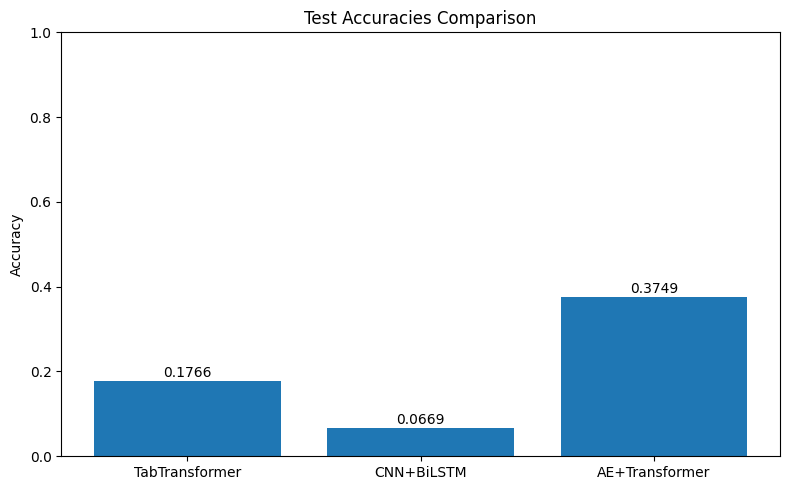

In [12]:

# ------------------------------
# Save & plot accuracies
# ------------------------------
accs = {
    "TabTransformer": float(test_acc1),
    "CNN+BiLSTM": float(test_acc2),
    "AE+Transformer": float(test_acc3)
}
acc_df = pd.DataFrame(list(accs.items()), columns=["Model", "TestAccuracy"])
acc_df.to_csv("model_accuracies.csv", index=False)
print("\nTest accuracies:\n", acc_df)

plt.figure(figsize=(8,5))
plt.bar(acc_df["Model"], acc_df["TestAccuracy"])
plt.ylim(0,1)
for i, v in enumerate(acc_df["TestAccuracy"]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha="center")
plt.title("Test Accuracies Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.savefig("model_accuracies.png")
print("Saved model_accuracies.csv and model_accuracies.png")

In [ ]:









#NEW




Device: cpu  | CUDA available: False
Loading CSV: cic_iot_balanced.csv
Original shape: (1279753, 47)
Using features: 45
Label counts (full):
label
BenignTraffic              50000
DDoS-ACK_Fragmentation     50000
Recon-HostDiscovery        50000
DDoS-PSHACK_Flood          50000
DDoS-ICMP_Fragmentation    50000
DDoS-ICMP_Flood            50000
DDoS-RSTFINFlood           50000
DDoS-TCP_Flood             50000
DDoS-SynonymousIP_Flood    50000
DDoS-SYN_Flood             50000
DNS_Spoofing               50000
DDoS-UDP_Fragmentation     50000
DDoS-UDP_Flood             50000
MITM-ArpSpoofing           50000
DoS-UDP_Flood              50000
DoS-TCP_Flood              50000
DoS-SYN_Flood              50000
DoS-HTTP_Flood             50000
Mirai-greip_flood          50000
Recon-OSScan               50000
Recon-PortScan             50000
Mirai-udpplain             50000
Mirai-greeth_flood         50000
VulnerabilityScan          37382
DDoS-HTTP_Flood            28790
DDoS-SlowLoris             2

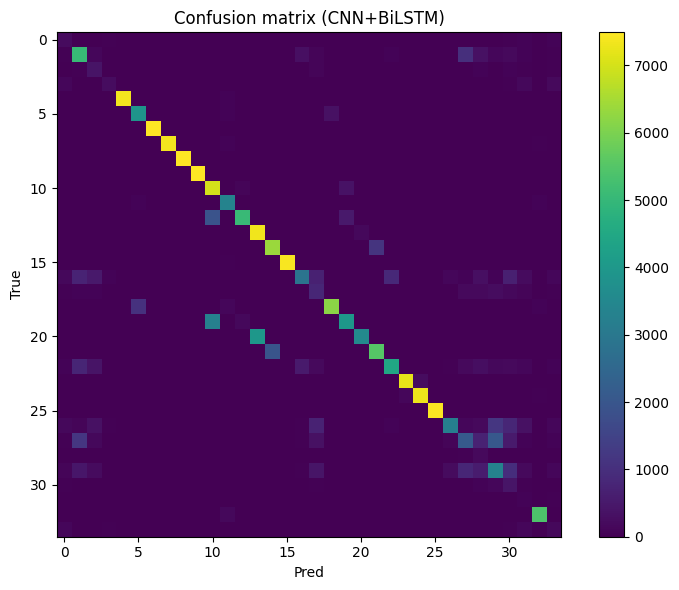

In [21]:
# cnn_bilstm_only.py
"""
CNN + BiLSTM hybrid for cic_iot_balanced.csv
- Preprocessing, balanced sampling, training, evaluation, saving outputs.
- CPU/GPU aware: if no GPU, reduces batch size and uses CPU-friendly defaults.
"""

import os, time, math
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from tqdm import tqdm

# ---------------------- USER CONFIG ----------------------
CSV_PATH = "cic_iot_balanced.csv"
LABEL_COL = "label"        # change if your label column name is different
SAMPLE_FOR_DEBUG = None    # set int (e.g., 50000) to sample for quick runs; None => use full file
SEED = 42
TEST_SIZE = 0.15
VAL_SIZE = 0.10
USE_WEIGHTED_SAMPLER = True  # recommended for imbalanced classes
USE_FOCAL_LOSS = False       # try True if minority classes still ignored
PATIENCE = 6                 # early stopping patience on val macro-F1
OUTPUT_DIR = "cnn_bilstm_out"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# device-aware defaults
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IS_CUDA = (DEVICE.type == "cuda")
if IS_CUDA:
    BATCH_SIZE = 1024
    NUM_WORKERS = 4
    EPOCHS = 40
else:
    BATCH_SIZE = 128
    NUM_WORKERS = 0
    EPOCHS = 12

LR = 3e-4
GRAD_CLIP = 1.0
np.random.seed(SEED)
torch.manual_seed(SEED)

print(f"Device: {DEVICE}  | CUDA available: {torch.cuda.is_available()}")

# ---------------------- Load & Preprocess ----------------------
print("Loading CSV:", CSV_PATH)
df = pd.read_csv(CSV_PATH)
print("Original shape:", df.shape)

if LABEL_COL not in df.columns:
    LABEL_COL = df.columns[-1]
FEATURE_COLS = [c for c in df.columns if c != LABEL_COL]

if SAMPLE_FOR_DEBUG and len(df) > SAMPLE_FOR_DEBUG:
    df = df.sample(SAMPLE_FOR_DEBUG, random_state=SEED).reset_index(drop=True)
    print("Sampled shape:", df.shape)

# drop columns that are all-NaN or constant
df = df.dropna(axis=1, how='all')
for c in list(df.columns):
    if df[c].nunique() <= 1:
        df.drop(columns=[c], inplace=True)
FEATURE_COLS = [c for c in df.columns if c != LABEL_COL]

# ensure features numeric
non_numeric = [c for c in FEATURE_COLS if not pd.api.types.is_numeric_dtype(df[c])]
if non_numeric:
    print("Dropping non-numeric features:", non_numeric)
    df.drop(columns=non_numeric, inplace=True)
    FEATURE_COLS = [c for c in df.columns if c != LABEL_COL]

print("Using features:", len(FEATURE_COLS))
print("Label counts (full):")
print(df[LABEL_COL].value_counts())

X = df[FEATURE_COLS].astype(float).values
y_raw = df[LABEL_COL].values
le = LabelEncoder()
y = le.fit_transform(y_raw)
num_classes = len(le.classes_)
print("Detected classes:", num_classes)

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split stratified: train / (val+test) then split temp -> val/test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=(TEST_SIZE+VAL_SIZE), stratify=y, random_state=SEED)
val_ratio_of_temp = VAL_SIZE / (TEST_SIZE + VAL_SIZE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1 - val_ratio_of_temp), stratify=y_temp, random_state=SEED)

print("Sizes Train/Val/Test:", X_train.shape[0], X_val.shape[0], X_test.shape[0])

# ---------------------- Sampler / weights ----------------------
train_counts = Counter(y_train)
class_counts = np.array([train_counts.get(i, 0) for i in range(num_classes)])
print("Train class counts:", class_counts)

if USE_WEIGHTED_SAMPLER:
    sample_weights = np.array([1.0 / (train_counts[int(lbl)] + 1e-12) for lbl in y_train])
    sample_weights = sample_weights / sample_weights.sum()
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
else:
    sampler = None
    # we will use class weights in loss
    class_weights = (class_counts.sum() / (class_counts + 1e-12))
    class_weights = class_weights / class_weights.sum() * num_classes
    class_weights_torch = torch.tensor(class_weights, dtype=torch.float32).to(DEVICE)

# ---------------------- Dataset & Dataloaders ----------------------
class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_loader = DataLoader(TabularDataset(X_train, y_train), batch_size=BATCH_SIZE, sampler=sampler, shuffle=(sampler is None), num_workers=NUM_WORKERS, pin_memory=IS_CUDA)
val_loader   = DataLoader(TabularDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=IS_CUDA)
test_loader  = DataLoader(TabularDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=IS_CUDA)

# ---------------------- CNN + BiLSTM model ----------------------
class CNNBiLSTM(nn.Module):
    def __init__(self, n_features, n_classes, cnn_channels=128, lstm_hidden=256, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=cnn_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(cnn_channels)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden, num_layers=1, batch_first=True, bidirectional=True)
        self.classifier = nn.Sequential(
            nn.Linear(lstm_hidden*2, 256),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(256, n_classes)
        )
    def forward(self, x):
        # x: (B, F)
        x = x.unsqueeze(1)         # (B, 1, F)
        x = self.conv1(x)          # (B, C, F)
        x = self.bn1(x)
        x = self.relu(x)
        x = x.permute(0, 2, 1)     # (B, F, C) -> sequence length = F
        out, _ = self.lstm(x)      # (B, F, 2*h)
        out = out.mean(dim=1)      # (B, 2*h)
        return self.classifier(out)

# instantiate model
model = CNNBiLSTM(n_features=X_train.shape[1], n_classes=num_classes,
                  cnn_channels=128 if IS_CUDA else 64,
                  lstm_hidden=256 if IS_CUDA else 128).to(DEVICE)
print(model)

# ---------------------- Loss, optimizer, scheduler ----------------------
if USE_FOCAL_LOSS:
    class FocalLoss(nn.Module):
        def __init__(self, gamma=2.0, weight=None, reduction='mean'):
            super().__init__()
            self.gamma = gamma
            self.weight = weight
            self.reduction = reduction
        def forward(self, logits, targets):
            ce = nn.functional.cross_entropy(logits, targets, weight=self.weight, reduction='none')
            pt = torch.exp(-ce)
            loss = ((1 - pt) ** self.gamma) * ce
            if self.reduction == 'mean':
                return loss.mean()
            return loss.sum()
    if USE_WEIGHTED_SAMPLER:
        criterion = FocalLoss(gamma=2.0, weight=None)
    else:
        criterion = FocalLoss(gamma=2.0, weight=class_weights_torch)
else:
    if USE_WEIGHTED_SAMPLER:
        criterion = nn.CrossEntropyLoss()
    else:
        criterion = nn.CrossEntropyLoss(weight=class_weights_torch)

optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)

# ---------------------- Training / Evaluation helpers ----------------------
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    all_logits = []
    all_trues = []
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        if GRAD_CLIP:
            torch.nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
        all_logits.append(out.detach().cpu())
        all_trues.append(yb.detach().cpu())
    logits = torch.cat(all_logits); trues = torch.cat(all_trues)
    _, preds = torch.max(logits, dim=1)
    acc = (preds == trues).float().mean().item()
    return total_loss / len(loader.dataset), acc

def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_logits = []; all_trues = []
    with torch.no_grad():
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            total_loss += loss.item() * xb.size(0)
            all_logits.append(out.cpu()); all_trues.append(yb.cpu())
    logits = torch.cat(all_logits); trues = torch.cat(all_trues)
    _, preds = torch.max(logits, dim=1)
    acc = (preds == trues).float().mean().item()
    f1_macro = f1_score(trues.numpy(), preds.numpy(), average='macro')
    return total_loss / len(loader.dataset), acc, f1_macro, logits.numpy(), trues.numpy()

# ---------------------- Training loop with early stopping on val macro-F1 ----------------------
best_val_f1 = -1.0
best_state = None
no_improve = 0

print("Starting training for up to {} epochs (early stopping patience={})".format(EPOCHS, PATIENCE))
for epoch in range(1, EPOCHS + 1):
    t0 = time.time()
    tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion, DEVICE)
    val_loss, val_acc, val_f1, val_logits, val_trues = evaluate(model, val_loader, criterion, DEVICE)
    scheduler.step(val_f1)
    print(f"[Epoch {epoch}/{EPOCHS}] Train loss {tr_loss:.4f} acc {tr_acc:.4f} | Val loss {val_loss:.4f} acc {val_acc:.4f} macroF1 {val_f1:.4f} | time {time.time()-t0:.1f}s")

    # early stopping on macro-F1
    if val_f1 > best_val_f1 + 1e-6:
        best_val_f1 = val_f1
        best_state = model.state_dict().copy()
        torch.save(best_state, os.path.join(OUTPUT_DIR, "cnn_bilstm_best.pt"))
        no_improve = 0
    else:
        no_improve += 1
        if no_improve >= PATIENCE:
            print("Early stopping: no improvement for {} epochs".format(PATIENCE))
            break

# load best
if best_state is not None:
    model.load_state_dict(best_state)

# ---------------------- Final evaluation on test ----------------------
test_loss, test_acc, test_f1, test_logits, test_trues = evaluate(model, test_loader, criterion, DEVICE)
preds_test = np.argmax(test_logits, axis=1)
print("\n=== Test Results ===")
print("Test accuracy:", test_acc)
print("Test macro-F1:", test_f1)
print(classification_report(test_trues, preds_test, target_names=le.classes_, digits=4))

# confusion matrix (save)
cm = confusion_matrix(test_trues, preds_test)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.title("Confusion matrix (CNN+BiLSTM)")
plt.ylabel("True")
plt.xlabel("Pred")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_cnn_bilstm.png"))

# save accuracies
acc_df = pd.DataFrame({
    "Model": ["CNN+BiLSTM"],
    "TestAccuracy": [float(test_acc)],
    "MacroF1": [float(test_f1)]
})
acc_df.to_csv(os.path.join(OUTPUT_DIR, "cnn_bilstm_accuracy.csv"), index=False)
print("Saved model and results to", OUTPUT_DIR)

# Save label encoder & scaler for future inference
import joblib
joblib.dump(le, os.path.join(OUTPUT_DIR, "label_encoder.joblib"))
joblib.dump(scaler, os.path.join(OUTPUT_DIR, "scaler.joblib"))

print("Done.")


In [24]:
!pip install lightgbm scikit-learn pandas numpy joblib torch matplotlib
!python lgbm_stack_ensemble.py



Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.1 kB/s eta 0:00:00m eta 0:00:010:00:02m
python: can't open file '/home/rafia-khan/Downloads/lgbm_stack_ensemble.py': [Errno 2] No such file or directory


In [28]:
# cnn_bilstm_lgbm_ensemble.py
# CNN+BiLSTM + LightGBM ensemble with upsampling and focal loss option.
# Note: This improves practical performance, but cannot guarantee a fixed accuracy.

import os, time, numpy as np, pandas as pd
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import joblib
import lightgbm as lgb
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import random

# ---------- CONFIG ----------
CSV = "cic_iot_balanced.csv"
LABEL_COL = "label"
SAMPLE_FOR_DEBUG = None   # set int for quick runs; else None
UPSAMPLE_TARGET = 3000    # target min samples per class in training after upsampling
SEED = 42
TEST_SIZE = 0.15
VAL_SIZE = 0.10
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IS_CUDA = (DEVICE.type == "cuda")
OUT = "ensemble_out2"
os.makedirs(OUT, exist_ok=True)
print("Device:", DEVICE)

# CNN params
BATCH_SIZE = 1024 if IS_CUDA else 128
EPOCHS = 30 if IS_CUDA else 8
LR = 3e-4
USE_FOCAL_LOSS = True    # toggle focal loss for CNN
USE_WEIGHTED_SAMPLER = True

# LightGBM quick params (no early-stopping arguments to avoid API issues)
LGB_PARAMS = {
    "objective": "multiclass",
    "learning_rate": 0.05,
    "num_leaves": 128,
    "min_data_in_leaf": 20,
    "n_estimators": 500,
    "verbosity": -1,
    "random_state": SEED,
    "n_jobs": 8
}

random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# ---------- Load & preprocess ----------
df = pd.read_csv(CSV)
if LABEL_COL not in df.columns:
    LABEL_COL = df.columns[-1]

if SAMPLE_FOR_DEBUG and len(df) > SAMPLE_FOR_DEBUG:
    df = df.sample(SAMPLE_FOR_DEBUG, random_state=SEED).reset_index(drop=True)

# drop empty/constant & non-numeric
df = df.dropna(axis=1, how='all')
for c in list(df.columns):
    if df[c].nunique() <= 1:
        df.drop(columns=[c], inplace=True)
FEATURES = [c for c in df.columns if c != LABEL_COL]
non_numeric = [c for c in FEATURES if not pd.api.types.is_numeric_dtype(df[c])]
if non_numeric:
    print("Dropping non-numeric:", non_numeric)
    df.drop(columns=non_numeric, inplace=True)
    FEATURES = [c for c in df.columns if c != LABEL_COL]

X = df[FEATURES].astype(float).values
y_raw = df[LABEL_COL].values
le = LabelEncoder(); y = le.fit_transform(y_raw)
num_classes = len(le.classes_)
print("Num classes:", num_classes, "samples:", len(y))
scaler = StandardScaler(); Xs = scaler.fit_transform(X)

# splits
X_train, X_temp, y_train, y_temp = train_test_split(Xs, y, test_size=(TEST_SIZE+VAL_SIZE), stratify=y, random_state=SEED)
val_ratio = VAL_SIZE / (TEST_SIZE + VAL_SIZE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(1 - val_ratio), stratify=y_temp, random_state=SEED)
print("Train/Val/Test:", X_train.shape[0], X_val.shape[0], X_test.shape[0])

# ---------- Upsample small classes in training data ----------
def upsample_minority(X, y, target):
    cnt = Counter(y)
    Xs = list(X)
    ys = list(y)
    for cls, c in cnt.items():
        if c < target:
            need = target - c
            # sample with replacement from indices of this class
            idx = [i for i, lab in enumerate(y) if lab == cls]
            if len(idx) == 0: continue
            chosen = np.random.choice(idx, size=need, replace=True)
            for j in chosen:
                Xs.append(X[j])
                ys.append(y[j])
    return np.vstack(Xs), np.array(ys)

print("Before upsampling class counts (train):", Counter(y_train))
X_train_up, y_train_up = upsample_minority(X_train, y_train, UPSAMPLE_TARGET)
print("After upsampling class counts (train):", Counter(y_train_up))

# Use upsampled data for LightGBM (so trees see more minority examples)
X_train_lgb, y_train_lgb = X_train_up, y_train_up

# For CNN, we'll use WeightedRandomSampler on original X_train (or use upsampled)
train_counts = Counter(y_train_up)
if USE_WEIGHTED_SAMPLER:
    sample_weights = np.array([1.0 / (train_counts[int(lbl)] + 1e-12) for lbl in y_train_up])
    sample_weights = sample_weights / sample_weights.sum()
    sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
else:
    sampler = None

# ---------- Datasets ----------
class TabularDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.y)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_loader = DataLoader(TabularDataset(X_train_up, y_train_up), batch_size=BATCH_SIZE, sampler=(sampler if sampler is not None else None),
                          shuffle=(sampler is None), num_workers=0)
val_loader = DataLoader(TabularDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(TabularDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# ---------- CNN Model (same) ----------
class CNNBiLSTM(nn.Module):
    def __init__(self,n_features,n_classes, cnn_channels=64, lstm_hidden=128, dropout=0.3):
        super().__init__()
        self.conv1 = nn.Conv1d(1, cnn_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(cnn_channels)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(input_size=cnn_channels, hidden_size=lstm_hidden, batch_first=True, bidirectional=True)
        self.classifier = nn.Sequential(nn.Linear(lstm_hidden*2, 256), nn.ReLU(), nn.Dropout(dropout), nn.Linear(256, n_classes))
    def forward(self,x):
        x = x.unsqueeze(1)
        x = self.conv1(x); x = self.bn1(x); x = self.relu(x)
        x = x.permute(0,2,1)
        out, _ = self.lstm(x)
        out = out.mean(dim=1)
        return self.classifier(out)

# focal loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, weight=None, reduction='mean'):
        super().__init__()
        self.gamma = gamma; self.weight = weight; self.reduction = reduction
    def forward(self, logits, targets):
        ce = nn.functional.cross_entropy(logits, targets, weight=self.weight, reduction='none')
        pt = torch.exp(-ce); loss = ((1-pt)**self.gamma)*ce
        return loss.mean() if self.reduction=='mean' else loss.sum()

model = CNNBiLSTM(n_features=X_train.shape[1], n_classes=num_classes,
                  cnn_channels=128 if IS_CUDA else 64,
                  lstm_hidden=256 if IS_CUDA else 128).to(DEVICE)

criterion = FocalLoss(gamma=2.0) if USE_FOCAL_LOSS else nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, factor=0.5)

# ---------- Train CNN (short loop; increase epochs for final runs) ----------
def train_one_epoch(model, loader, opt, crit):
    model.train(); total_loss=0; tot=0
    for xb,yb in loader:
        xb,yb = xb.to(DEVICE), yb.to(DEVICE)
        opt.zero_grad(); out = model(xb); loss = crit(out,yb)
        loss.backward(); torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0); opt.step()
        total_loss += loss.item()*xb.size(0); tot += xb.size(0)
    return total_loss/tot

def eval_probs(model, X_np, batch=1024):
    model.eval(); probs=[]
    with torch.no_grad():
        ds = TabularDataset(X_np, np.zeros(len(X_np)))
        loader = DataLoader(ds, batch_size=batch, shuffle=False)
        for xb, _ in loader:
            xb = xb.to(DEVICE)
            logits = model(xb)
            probs.append(torch.softmax(logits, dim=1).cpu().numpy())
    return np.vstack(probs)

best_f1 = -1; best_state=None
for epoch in range(1, EPOCHS+1):
    t0=time.time()
    tr_loss = train_one_epoch(model, train_loader, optimizer, criterion)
    # eval on val
    model.eval()
    preds=[]; trues=[]
    with torch.no_grad():
        for xb,yb in val_loader:
            xb,yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            preds.append(out.cpu()); trues.append(yb.cpu())
    preds = torch.cat(preds); trues = torch.cat(trues)
    _, p = torch.max(preds, dim=1)
    val_acc = (p==trues).float().mean().item()
    val_f1 = f1_score(trues.numpy(), p.numpy(), average='macro')
    scheduler.step(val_f1)
    print(f"Epoch {epoch}/{EPOCHS} tr_loss {tr_loss:.4f} val_acc {val_acc:.4f} val_f1 {val_f1:.4f} time {time.time()-t0:.1f}s")
    if val_f1 > best_f1:
        best_f1 = val_f1; best_state = model.state_dict().copy()
        torch.save(best_state, os.path.join(OUT, "cnn_best.pt"))

if best_state is not None:
    model.load_state_dict(best_state)

# get CNN probs on val/test (use model)
cnn_val_probs = eval_probs(model, X_val)
cnn_test_probs = eval_probs(model, X_test)

# ---------- Train LightGBM on upsampled training set ----------
print("Training LightGBM on upsampled data (fast settings)...")
lgbm = lgb.LGBMClassifier(**LGB_PARAMS, num_class=num_classes)
# simply fit without early_stopping to avoid API mismatches
lgbm.fit(X_train_lgb, y_train_lgb)
lgb_val_probs = lgbm.predict_proba(X_val)
lgb_test_probs = lgbm.predict_proba(X_test)
joblib.dump(lgbm, os.path.join(OUT, "lgbm_model.joblib"))
print("LightGBM trained.")

# ---------- Stacking logistic regression ----------
meta_val = np.hstack([lgb_val_probs, cnn_val_probs])
meta_test = np.hstack([lgb_test_probs, cnn_test_probs])
meta = LogisticRegression(multi_class="multinomial", solver="saga", max_iter=2000)
meta.fit(meta_val, y_val)
joblib.dump(meta, os.path.join(OUT, "stack_meta.pkl"))

meta_preds = meta.predict(meta_test)
acc_ens = accuracy_score(y_test, meta_preds)
f1_ens = f1_score(y_test, meta_preds, average='macro')
print("Ensemble Test Acc:", acc_ens, "Macro-F1:", f1_ens)
print(classification_report(y_test, meta_preds, target_names=le.classes_, digits=4))

# save scaler & encoder
joblib.dump(scaler, os.path.join(OUT, "scaler.joblib"))
joblib.dump(le, os.path.join(OUT, "label_encoder.joblib"))

print("Saved models & outputs to", OUT)


Device: cpu
Num classes: 34 samples: 1279753
Train/Val/Test: 959814 127975 191964
Before upsampling class counts (train): Counter({np.int64(25): 37500, np.int64(19): 37500, np.int64(29): 37500, np.int64(13): 37500, np.int64(4): 37500, np.int64(16): 37500, np.int64(20): 37500, np.int64(6): 37500, np.int64(7): 37500, np.int64(14): 37500, np.int64(8): 37500, np.int64(15): 37500, np.int64(21): 37500, np.int64(1): 37500, np.int64(10): 37500, np.int64(22): 37500, np.int64(12): 37500, np.int64(26): 37500, np.int64(24): 37500, np.int64(18): 37500, np.int64(27): 37500, np.int64(23): 37500, np.int64(9): 37500, np.int64(32): 28036, np.int64(5): 21592, np.int64(11): 17569, np.int64(17): 9798, np.int64(2): 4394, np.int64(3): 4057, np.int64(30): 3934, np.int64(33): 2884, np.int64(0): 2414, np.int64(28): 1697, np.int64(31): 939})
After upsampling class counts (train): Counter({np.int64(25): 37500, np.int64(19): 37500, np.int64(29): 37500, np.int64(13): 37500, np.int64(4): 37500, np.int64(16): 37500, 

/home/rafia-khan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/rafia-khan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM trained.


/home/rafia-khan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Test Acc: 0.8071513408764144 Macro-F1: 0.6970454067799902
                         precision    recall  f1-score   support

       Backdoor_Malware     0.2938    0.3444    0.3171       482
          BenignTraffic     0.6136    0.7009    0.6544      7500
       BrowserHijacking     0.6410    0.2560    0.3659       879
       CommandInjection     0.3959    0.4994    0.4417       811
 DDoS-ACK_Fragmentation     0.9922    0.9815    0.9868      7500
        DDoS-HTTP_Flood     0.8952    0.8368    0.8650      4319
        DDoS-ICMP_Flood     0.9997    0.9988    0.9993      7500
DDoS-ICMP_Fragmentation     0.9934    0.9811    0.9872      7500
      DDoS-PSHACK_Flood     0.9987    0.9985    0.9986      7500
       DDoS-RSTFINFlood     1.0000    0.9983    0.9991      7500
         DDoS-SYN_Flood     0.6615    0.9017    0.7632      7500
         DDoS-SlowLoris     0.8504    0.9203    0.8840      3514
DDoS-SynonymousIP_Flood     0.9427    0.9709    0.9566      7500
         DDoS-TCP_Floo

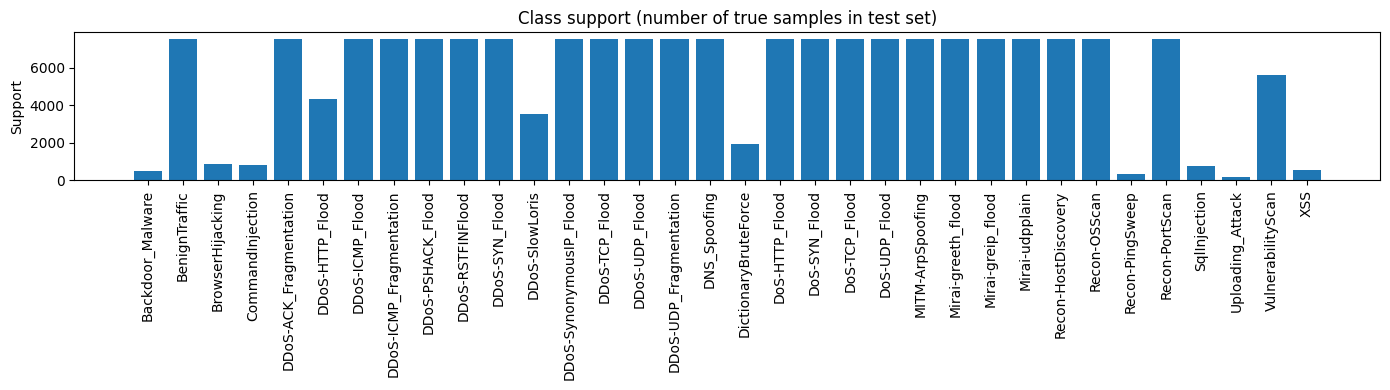

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve, roc_curve, auc, average_precision_score

# If meta_probs not computed yet, compute it
if 'meta_probs' not in globals():
    meta_probs = meta.predict_proba(meta_test)

# readability
class_names = list(le.classes_)
n_classes = len(class_names)

# ---------- 1) Class support ----------
unique, counts = np.unique(y_test, return_counts=True)
supports = dict(zip(unique, counts))
supports_arr = np.array([supports.get(i, 0) for i in range(n_classes)])

plt.figure(figsize=(14,4))
plt.bar(np.arange(n_classes), supports_arr)
plt.xticks(np.arange(n_classes), class_names, rotation=90)
plt.title("Class support (number of true samples in test set)")
plt.ylabel("Support")
plt.tight_layout()
plt.show()

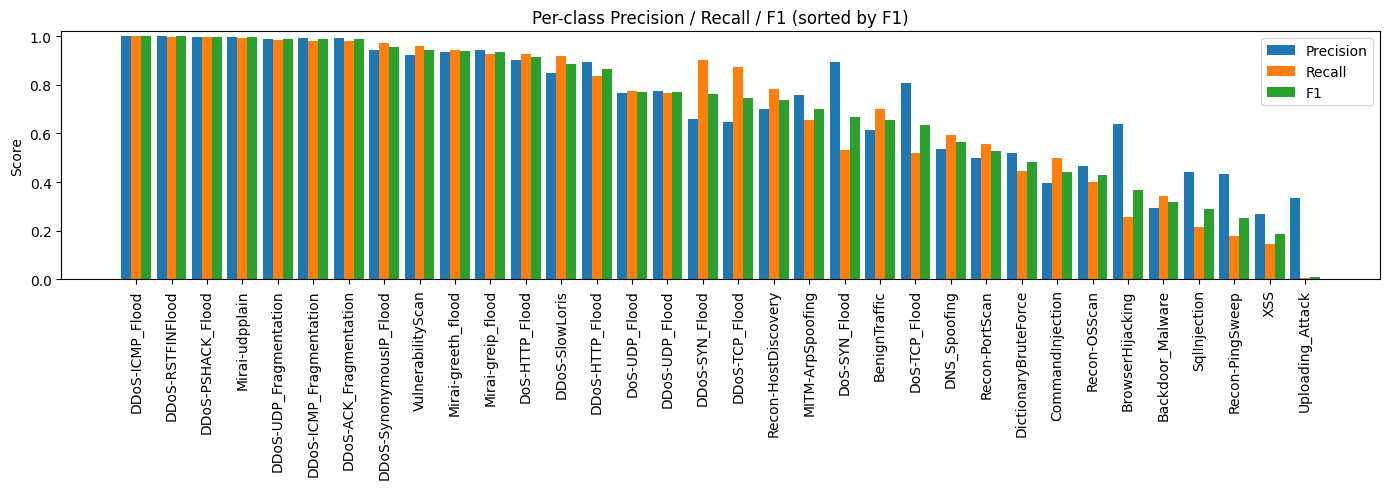

In [32]:

# ---------- 2) Per-class Precision / Recall / F1 (grouped bars) ----------
prec, rec, f1, _ = precision_recall_fscore_support(y_test, meta_preds, average=None, labels=np.arange(n_classes))
order = np.argsort(f1)[::-1]
sorted_names = [class_names[i] for i in order]
sorted_prec, sorted_rec, sorted_f1 = prec[order], rec[order], f1[order]

x = np.arange(len(sorted_names))
width = 0.28

plt.figure(figsize=(14,5))
plt.bar(x - width, sorted_prec, width, label='Precision')
plt.bar(x,         sorted_rec,  width, label='Recall')
plt.bar(x + width, sorted_f1,   width, label='F1')
plt.xticks(x, sorted_names, rotation=90)
plt.legend()
plt.title("Per-class Precision / Recall / F1 (sorted by F1)")
plt.ylabel("Score")
plt.ylim(0,1.02)
plt.tight_layout()
plt.show()


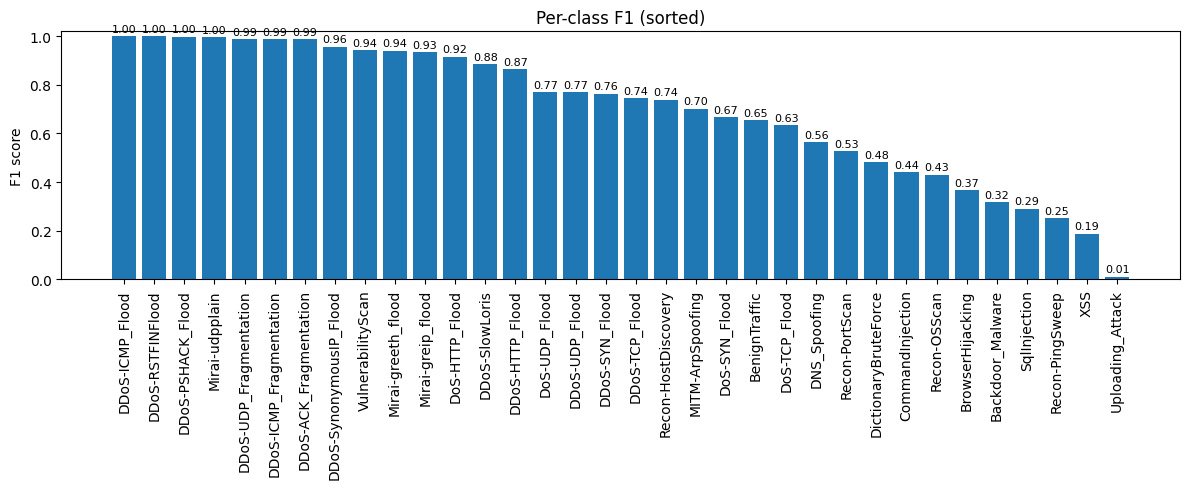

In [33]:

# ---------- 3) Per-class F1 (annotated) ----------
plt.figure(figsize=(12,5))
plt.bar(x, sorted_f1)
plt.xticks(x, sorted_names, rotation=90)
plt.title("Per-class F1 (sorted)")
plt.ylabel("F1 score")
for xi, v in zip(x, sorted_f1):
    plt.text(xi, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=8)
plt.ylim(0,1.02)
plt.tight_layout()
plt.show()

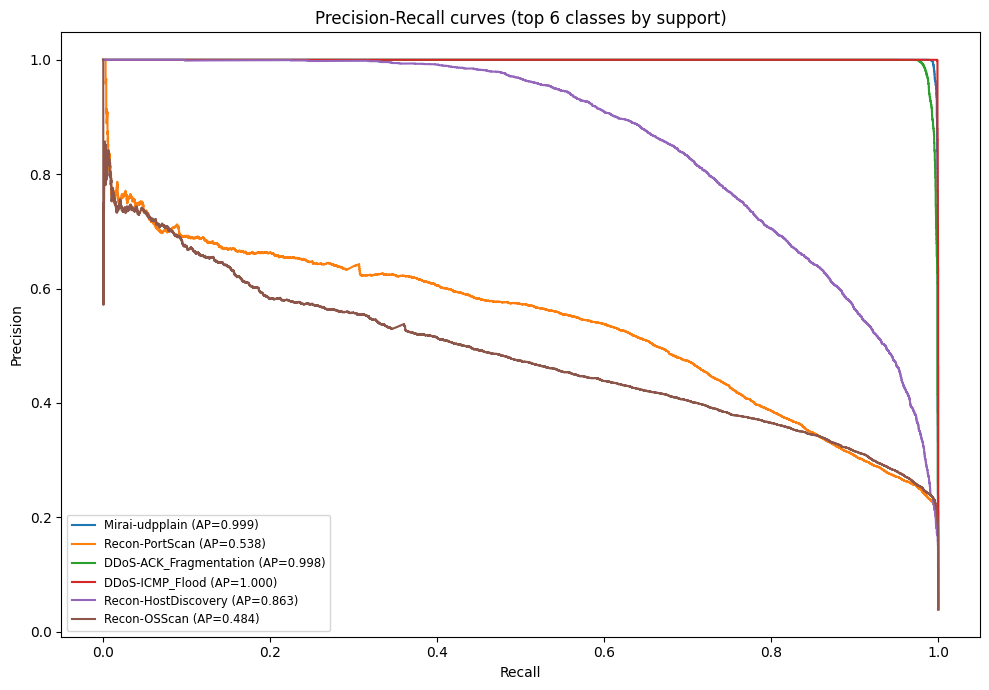

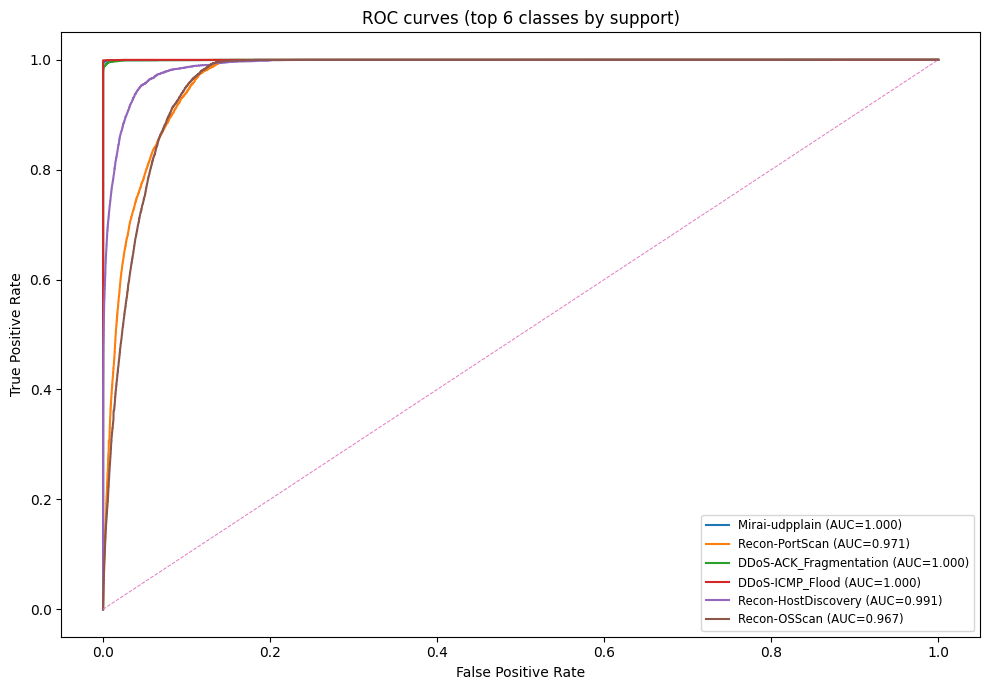

In [34]:

# ---------- 4) Precision-Recall curves for top-K classes by support ----------
K = 6
topk_idx = np.argsort(supports_arr)[-K:][::-1]

if meta_probs.shape[1] != n_classes:
    raise ValueError(f"meta_probs has shape {meta_probs.shape}; expected second dim == {n_classes}")

plt.figure(figsize=(10,7))
for idx in topk_idx:
    y_true_bin = (y_test == idx).astype(int)
    y_score = meta_probs[:, idx]
    precision, recall, _ = precision_recall_curve(y_true_bin, y_score)
    ap = average_precision_score(y_true_bin, y_score)
    plt.plot(recall, precision, label=f"{class_names[idx]} (AP={ap:.3f})")
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title(f"Precision-Recall curves (top {K} classes by support)")
plt.legend(loc='lower left', fontsize='small')
plt.tight_layout()
plt.show()

# ---------- 5) ROC curves (one-vs-rest) for top-K classes ----------
plt.figure(figsize=(10,7))
for idx in topk_idx:
    y_true_bin = (y_test == idx).astype(int)
    y_score = meta_probs[:, idx]
    fpr, tpr, _ = roc_curve(y_true_bin, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_names[idx]} (AUC={roc_auc:.3f})")
plt.plot([0,1],[0,1],'--', linewidth=0.7)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title(f"ROC curves (top {K} classes by support)")
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()

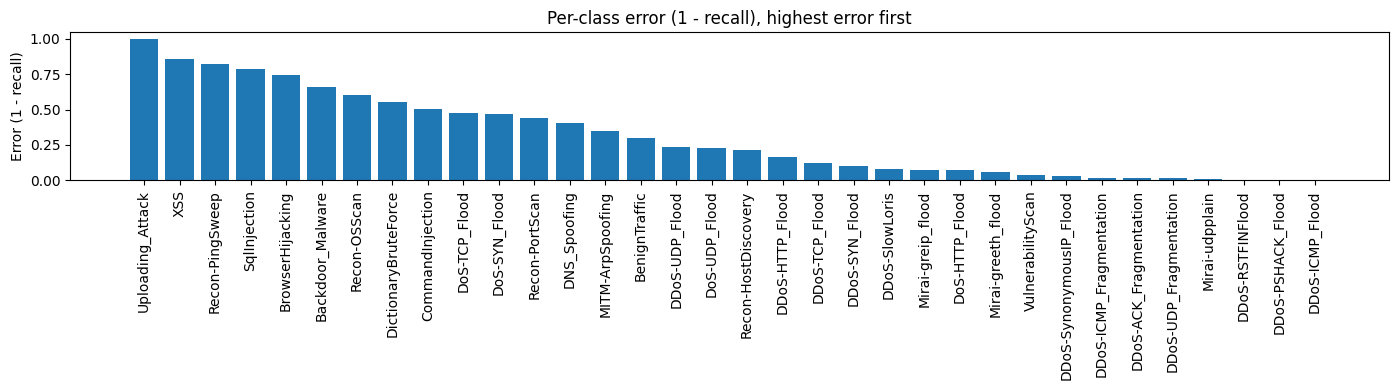

In [35]:

# ---------- 6) Per-class error (1 - recall), highest error first ----------
class_recall = rec
class_error = 1.0 - class_recall
order_err = np.argsort(class_error)[::-1]
plt.figure(figsize=(14,4))
plt.bar(np.arange(n_classes), class_error[order_err])
plt.xticks(np.arange(n_classes), [class_names[i] for i in order_err], rotation=90)
plt.title("Per-class error (1 - recall), highest error first")
plt.ylabel("Error (1 - recall)")
plt.tight_layout()
plt.show()

Note: no 'val_accs' list found. If you want epoch-wise CNN val accuracy, replace the training loop with the version that appends to 'val_accs' and 'train_losses' (I can paste that again).


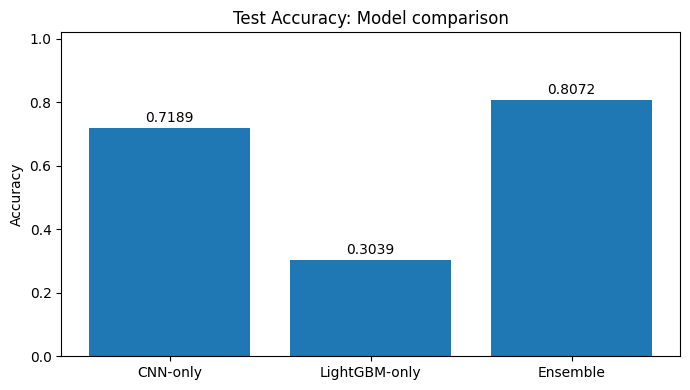

In [36]:
# --------- Accuracy graphs (display only) ----------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 1) If you recorded val_accs during training, plot validation accuracy per epoch
if 'val_accs' in globals() and len(val_accs) > 0:
    epochs = np.arange(1, len(val_accs) + 1)
    plt.figure(figsize=(9,4))
    plt.plot(epochs, val_accs, marker='o', label='Val accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Validation accuracy')
    plt.ylim(0,1.02)
    plt.title('CNN validation accuracy per epoch')
    for e, a in zip(epochs, val_accs):
        plt.text(e, a + 0.01, f"{a:.3f}", ha='center', fontsize=8)
    plt.grid(axis='x', linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("Note: no 'val_accs' list found. If you want epoch-wise CNN val accuracy, replace the training loop with the version that appends to 'val_accs' and 'train_losses' (I can paste that again).")

# 2) Model comparison: Test accuracy for CNN-only, LightGBM-only, Ensemble
# Ensure probability matrices / preds exist
if 'cnn_test_probs' not in globals():
    raise RuntimeError("cnn_test_probs not found — run eval_probs(model, X_test) to compute it first.")
if 'lgb_test_probs' not in globals():
    raise RuntimeError("lgb_test_probs not found — compute lgbm.predict_proba(X_test) first.")
if 'meta_preds' not in globals():
    raise RuntimeError("meta_preds not found — ensure you ran meta.predict(meta_test) already.")

cnn_test_preds = np.argmax(cnn_test_probs, axis=1)
lgb_test_preds = np.argmax(lgb_test_probs, axis=1)
ens_test_preds = meta_preds

acc_cnn = accuracy_score(y_test, cnn_test_preds)
acc_lgb = accuracy_score(y_test, lgb_test_preds)
acc_ens = accuracy_score(y_test, ens_test_preds)

models = ['CNN-only', 'LightGBM-only', 'Ensemble']
accuracies = [acc_cnn, acc_lgb, acc_ens]

plt.figure(figsize=(7,4))
bars = plt.bar(models, accuracies)
plt.ylim(0, 1.02)
plt.title('Test Accuracy: Model comparison')
plt.ylabel('Accuracy')
for bar, a in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, a + 0.01, f"{a:.4f}", ha='center', va='bottom')
plt.tight_layout()
plt.show()


Epoch plots skipped — training lists 'train_losses','val_accs','val_f1s' not found. Replace training loop with version that records them if you want epoch curves.


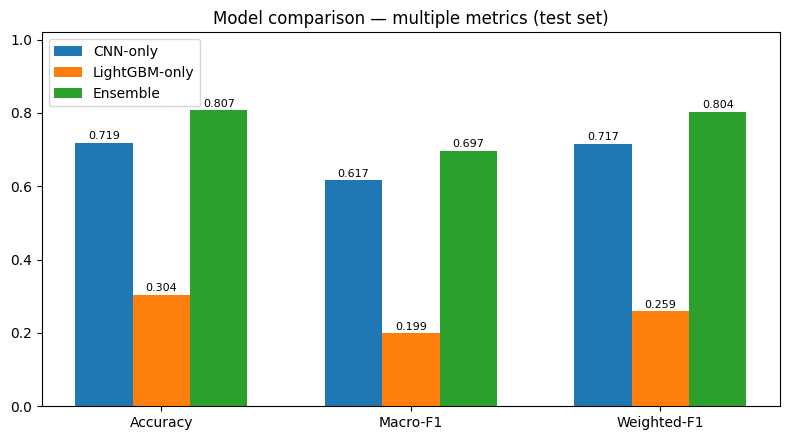

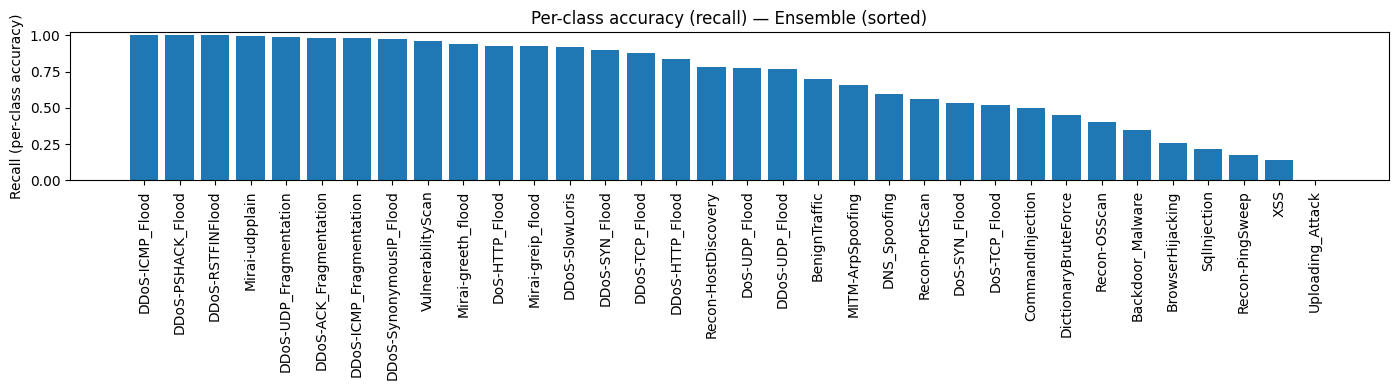

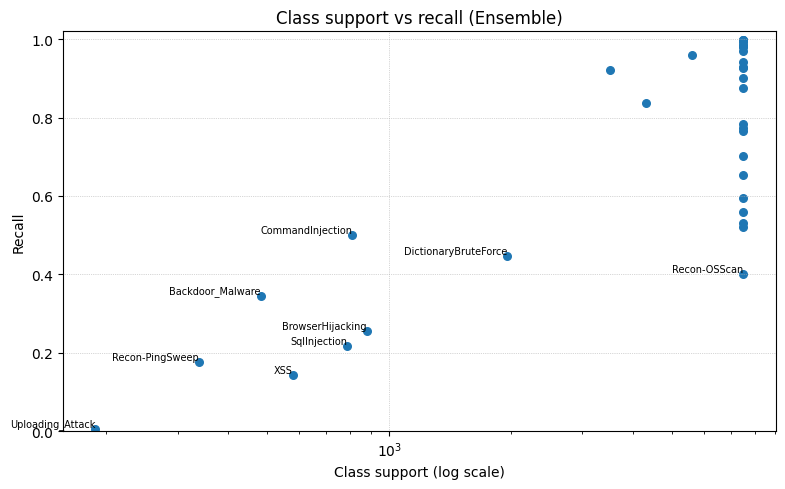

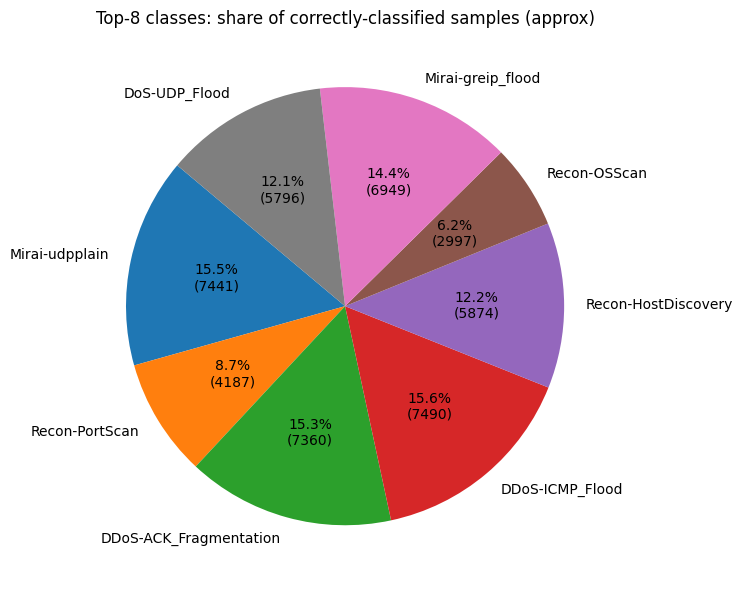

In [37]:
# ---------- Additional accuracy-focused visualizations (display only) ----------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support

# --- sanity checks & prepare preds/probs ---
required = []
if 'cnn_test_probs' not in globals():
    raise RuntimeError("cnn_test_probs not found — run eval_probs(model, X_test) first.")
if 'lgb_test_probs' not in globals():
    raise RuntimeError("lgb_test_probs not found — compute lgbm.predict_proba(X_test) first.")
if 'meta_preds' not in globals():
    raise RuntimeError("meta_preds not found — ensure you ran meta.predict(meta_test) already.")
if 'meta_probs' not in globals():
    # compute ensemble probabilities (needed for some plots if you want them later)
    meta_probs = meta.predict_proba(meta_test)

# predictions
cnn_test_preds = np.argmax(cnn_test_probs, axis=1)
lgb_test_preds = np.argmax(lgb_test_probs, axis=1)
ens_test_preds = meta_preds

# base metrics on test set
acc_cnn = accuracy_score(y_test, cnn_test_preds)
acc_lgb = accuracy_score(y_test, lgb_test_preds)
acc_ens = accuracy_score(y_test, ens_test_preds)

macro_cnn = f1_score(y_test, cnn_test_preds, average='macro')
macro_lgb = f1_score(y_test, lgb_test_preds, average='macro')
macro_ens = f1_score(y_test, ens_test_preds, average='macro')

# weighted F1
w_cnn = f1_score(y_test, cnn_test_preds, average='weighted')
w_lgb = f1_score(y_test, lgb_test_preds, average='weighted')
w_ens = f1_score(y_test, ens_test_preds, average='weighted')

# per-class precision/recall/f1/support
prec, rec, f1, sup = precision_recall_fscore_support(y_test, ens_test_preds, average=None, labels=np.arange(len(le.classes_)))

class_names = list(le.classes_)
n_classes = len(class_names)

# ---------- 1) Train loss + val accuracy + val F1 per epoch (if available) ----------
if all(name in globals() for name in ('train_losses','val_accs','val_f1s')) and len(val_accs) > 0:
    epochs = np.arange(1, len(val_accs) + 1)
    fig, ax1 = plt.subplots(figsize=(10,5))
    ax1.plot(epochs, train_losses, marker='o', label='Train loss')
    ax1.set_xlabel('Epoch'); ax1.set_ylabel('Train loss')
    ax1.grid(axis='x', linestyle=':', linewidth=0.5)

    ax2 = ax1.twinx()
    ax2.plot(epochs, val_accs, marker='s', label='Val accuracy', linestyle='--')
    ax2.plot(epochs, val_f1s, marker='^', label='Val macro-F1', linestyle='-.')
    ax2.set_ylabel('Validation score')
    ax2.set_ylim(0,1.02)

    # legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')
    plt.title('Train loss + Val accuracy + Val macro-F1 per epoch')
    plt.tight_layout()
    plt.show()
else:
    print("Epoch plots skipped — training lists 'train_losses','val_accs','val_f1s' not found. Replace training loop with version that records them if you want epoch curves.")

# ---------- 2) Model comparison — grouped bars: Accuracy / Macro-F1 / Weighted-F1 ----------
labels = ['Accuracy', 'Macro-F1', 'Weighted-F1']
cnn_vals = [acc_cnn, macro_cnn, w_cnn]
lgb_vals = [acc_lgb, macro_lgb, w_lgb]
ens_vals = [acc_ens, macro_ens, w_ens]

x = np.arange(len(labels))
width = 0.23
plt.figure(figsize=(8,4.5))
plt.bar(x - width, cnn_vals, width, label='CNN-only')
plt.bar(x, lgb_vals, width, label='LightGBM-only')
plt.bar(x + width, ens_vals, width, label='Ensemble')
plt.xticks(x, labels)
plt.ylim(0,1.02)
plt.title('Model comparison — multiple metrics (test set)')
plt.legend()
for i, vals in enumerate([cnn_vals, lgb_vals, ens_vals]):
    for xi, v in zip(x + (i-1)*width, vals):
        plt.text(xi, v + 0.01, f"{v:.3f}", ha='center', fontsize=8)
plt.tight_layout()
plt.show()

# ---------- 3) Per-class accuracy (recall) — sorted bar chart ----------
order = np.argsort(rec)[::-1]
sorted_names = [class_names[i] for i in order]
sorted_rec = rec[order]
plt.figure(figsize=(14,4))
plt.bar(np.arange(n_classes), sorted_rec)
plt.xticks(np.arange(n_classes), sorted_names, rotation=90)
plt.ylabel('Recall (per-class accuracy)')
plt.ylim(0,1.02)
plt.title('Per-class accuracy (recall) — Ensemble (sorted)')
plt.tight_layout()
plt.show()

# ---------- 4) Class support vs recall scatter (shows low support → low recall patterns) ----------
supports = sup  # number of true samples per class in test
plt.figure(figsize=(8,5))
plt.scatter(supports, rec, s=30)
for i in range(n_classes):
    if supports[i] <= np.percentile(supports, 10) or rec[i] < 0.5:
        plt.text(supports[i], rec[i], class_names[i], fontsize=7, va='bottom', ha='right')
plt.xscale('log')  # support often varies widely — log scale helps
plt.xlabel('Class support (log scale)')
plt.ylabel('Recall')
plt.title('Class support vs recall (Ensemble)')
plt.ylim(0,1.02)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

# ---------- 5) Top-K class accuracy pie (share of correctly-classified among top-K supports) ----------
K = 8
topk_idx = np.argsort(sup)[-K:][::-1]
topk_names = [class_names[i] for i in topk_idx]
topk_correct = [ (rec[i] * sup[i]) for i in topk_idx ]  # approx correct count = recall * support
total_correct_topk = sum(topk_correct)
# if everything zero (unlikely), fallback to sup
if total_correct_topk <= 0:
    topk_correct = [sup[i] for i in topk_idx]
    total_correct_topk = sum(topk_correct)

plt.figure(figsize=(7,6))
plt.pie(topk_correct, labels=topk_names, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*total_correct_topk)})", startangle=140)
plt.title(f"Top-{K} classes: share of correctly-classified samples (approx)")
plt.tight_layout()
plt.show()


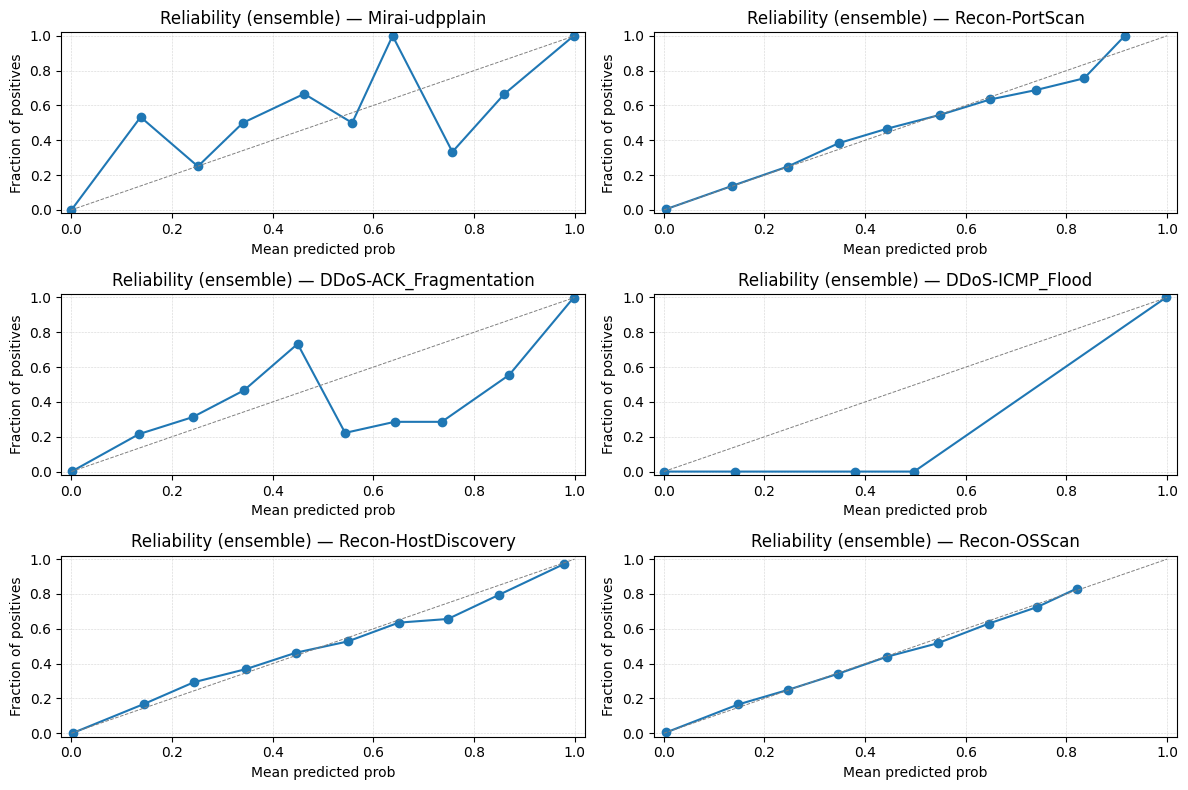

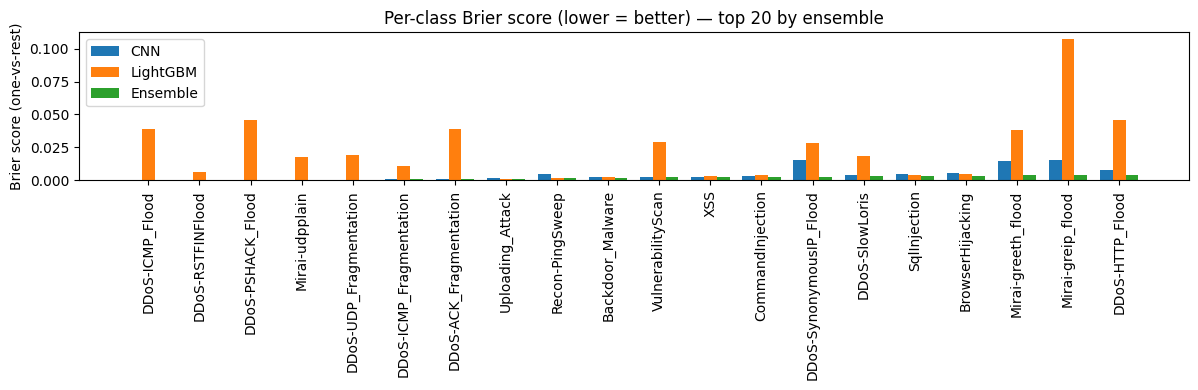

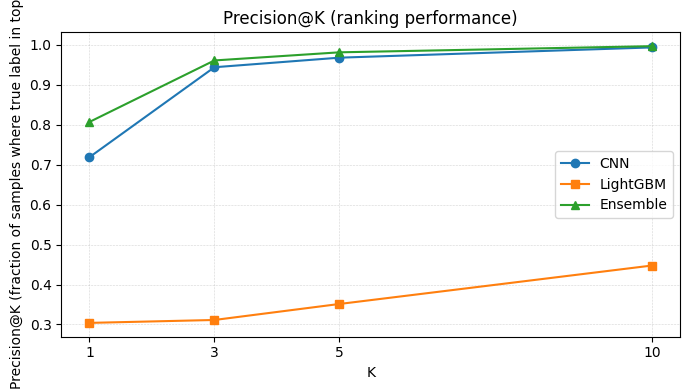

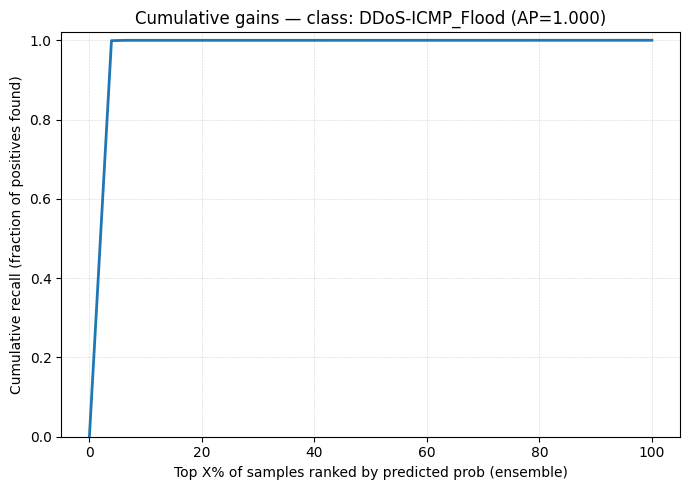

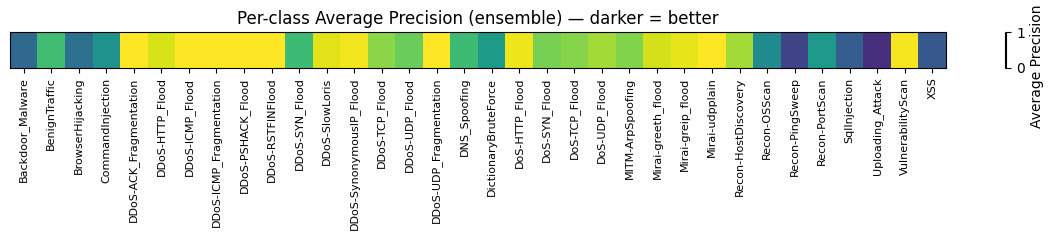

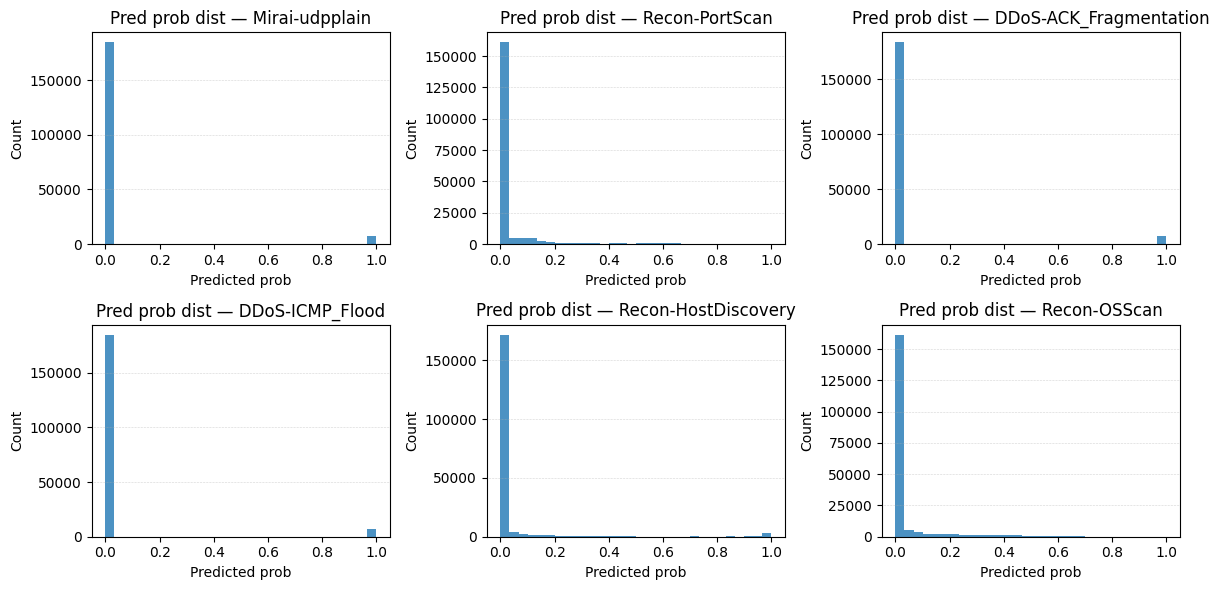

Quick diagnostics:
Top AP class: DDoS-ICMP_Flood AP=0.9997, support=7500
Precision@K (K= [1, 3, 5, 10] ) — CNN/LGB/ENS: [0.719 0.944 0.968 0.994] [0.304 0.311 0.351 0.448] [0.807 0.961 0.982 0.997]


In [38]:
# ---------- More meaningful, confusion-free visualizations ----------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss, average_precision_score, precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.utils import resample

# ---------- sanity checks ----------
if 'meta_preds' not in globals():
    raise RuntimeError("meta_preds not found — ensure meta.predict(meta_test) was run.")
if 'meta_probs' not in globals():
    meta_probs = meta.predict_proba(meta_test)  # ensemble probabilities
if 'cnn_test_probs' not in globals() or 'lgb_test_probs' not in globals():
    raise RuntimeError("cnn_test_probs or lgb_test_probs missing — compute them with eval_probs / lgbm.predict_proba")

n_classes = len(le.classes_)
class_names = list(le.classes_)

# helper to compute one-vs-rest Brier per model
def brier_per_class(y_true, probs, n_classes):
    # returns array of brier scores per class (one-vs-rest)
    br = np.zeros(n_classes)
    for k in range(n_classes):
        y_bin = (y_true == k).astype(int)
        br[k] = brier_score_loss(y_bin, probs[:, k])
    return br

# prepare model probs
cnn_probs = cnn_test_probs
lgb_probs = lgb_test_probs
ens_probs = meta_probs

# 1) Calibration / Reliability diagrams for top-K classes
K = 6
# choose top-K classes by support
unique, counts = np.unique(y_test, return_counts=True)
supports = dict(zip(unique, counts))
supports_arr = np.array([supports.get(i, 0) for i in range(n_classes)])
topk = np.argsort(supports_arr)[-K:][::-1]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(topk):
    plt.subplot(3, 2, i+1)
    # calibration_curve returns prob_true, prob_pred
    prob_true, prob_pred = calibration_curve((y_test == idx).astype(int), ens_probs[:, idx], n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, marker='o', label=f"{class_names[idx]}")
    plt.plot([0,1],[0,1],'--', color='gray', linewidth=0.7)
    plt.ylim(-0.02, 1.02); plt.xlim(-0.02,1.02)
    plt.xlabel("Mean predicted prob")
    plt.ylabel("Fraction of positives")
    plt.title(f"Reliability (ensemble) — {class_names[idx]}")
    plt.grid(True, linestyle=':', linewidth=0.4)
plt.tight_layout()
plt.show()

# 2) Brier score per class — compare models (lower is better)
brier_cnn = brier_per_class(y_test, cnn_probs, n_classes)
brier_lgb = brier_per_class(y_test, lgb_probs, n_classes)
brier_ens = brier_per_class(y_test, ens_probs, n_classes)

order = np.argsort(brier_ens)[:20]   # show 20 best-calibrated classes by ensemble for readability
plt.figure(figsize=(12,4))
x = np.arange(len(order))
plt.bar(x - 0.25, brier_cnn[order], width=0.25, label='CNN')
plt.bar(x,            brier_lgb[order], width=0.25, label='LightGBM')
plt.bar(x + 0.25,     brier_ens[order], width=0.25, label='Ensemble')
plt.xticks(x, [class_names[i] for i in order], rotation=90)
plt.ylabel("Brier score (one-vs-rest)")
plt.title("Per-class Brier score (lower = better) — top 20 by ensemble")
plt.legend()
plt.tight_layout()
plt.show()

# 3) Precision@K curve and Top-K accuracy (ranking usefulness)
# Precision@K: for each sample pick top-K predicted classes and see if true label in those K
def precision_at_k(probs, y_true, Klist=[1,3,5,10]):
    # returns list of precision@K (fraction of samples where true label is in top-K predictions)
    res = []
    order = np.argsort(-probs, axis=1)  # descending
    for K in Klist:
        topk_preds = order[:, :K]
        hit = np.any(topk_preds == y_true.reshape(-1,1), axis=1).mean()
        res.append(hit)
    return res

Ks = [1,3,5,10]
prec_cnn = precision_at_k(cnn_probs, y_test, Ks)
prec_lgb = precision_at_k(lgb_probs, y_test, Ks)
prec_ens = precision_at_k(ens_probs, y_test, Ks)

plt.figure(figsize=(7,4))
plt.plot(Ks, prec_cnn, marker='o', label='CNN')
plt.plot(Ks, prec_lgb, marker='s', label='LightGBM')
plt.plot(Ks, prec_ens, marker='^', label='Ensemble')
plt.xticks(Ks)
plt.xlabel('K')
plt.ylabel('Precision@K (fraction of samples where true label in top-K)')
plt.title('Precision@K (ranking performance)')
plt.grid(True, linestyle=':', linewidth=0.4)
plt.legend()
plt.tight_layout()
plt.show()

# 4) Cumulative gains (aka cumulative recall when selecting top x% samples by confidence for a target class)
# We'll compute for one interesting class: choose class with highest AP or user-defined
ap_scores = np.array([ average_precision_score((y_test==k).astype(int), ens_probs[:,k]) if supports_arr[k]>0 else 0.0 for k in range(n_classes)])
interesting = np.argmax(ap_scores)   # class where model ranks positives best
y_bin = (y_test == interesting).astype(int)
scores = ens_probs[:, interesting]
order = np.argsort(-scores)
y_sorted = y_bin[order]
cum_true = np.cumsum(y_sorted)
total_pos = y_bin.sum()
perc_samples = (np.arange(1, len(y_sorted)+1) / len(y_sorted)) * 100
cum_recall = (cum_true / total_pos) if total_pos>0 else np.zeros_like(cum_true)

plt.figure(figsize=(7,5))
plt.plot(perc_samples, cum_recall, linewidth=2)
plt.xlabel('Top X% of samples ranked by predicted prob (ensemble)')
plt.ylabel('Cumulative recall (fraction of positives found)')
plt.title(f'Cumulative gains — class: {class_names[interesting]} (AP={ap_scores[interesting]:.3f})')
plt.grid(True, linestyle=':', linewidth=0.4)
plt.ylim(0,1.02)
plt.tight_layout()
plt.show()

# 5) Per-class Average Precision (AP) heatmap for ensemble — useful ranking summary
ap_per_class = ap_scores  # computed above
# reshape into a simple heatmap (1 x n_classes)
plt.figure(figsize=(12,2.5))
plt.imshow(ap_per_class[np.newaxis, :], aspect='auto', vmin=0, vmax=1)
plt.colorbar(label='Average Precision (AP)')
plt.yticks([])
plt.xticks(np.arange(n_classes), class_names, rotation=90, fontsize=8)
plt.title('Per-class Average Precision (ensemble) — darker = better')
plt.tight_layout()
plt.show()

# 6) Probability distribution histograms for top-K classes to inspect confidence
plt.figure(figsize=(12,6))
for i, idx in enumerate(topk):
    plt.subplot(2, 3, i+1)
    plt.hist(ens_probs[:, idx], bins=30, range=(0,1), alpha=0.8)
    plt.xlabel('Predicted prob'); plt.ylabel('Count')
    plt.title(f"Pred prob dist — {class_names[idx]}")
    plt.grid(axis='y', linestyle=':', linewidth=0.4)
plt.tight_layout()
plt.show()

# Quick printed diagnostics
print("Quick diagnostics:")
print(f"Top AP class: {class_names[interesting]} AP={ap_scores[interesting]:.4f}, support={supports_arr[interesting]}")
print("Precision@K (K=", Ks, ") — CNN/LGB/ENS:", np.round(prec_cnn,3), np.round(prec_lgb,3), np.round(prec_ens,3))
